<font color='cf1010'>
   
## HR Analytics



### Problem Statement
### -----------------------------------------------------------------------------------------------------------------------------

Your client is a large MNC and they have 9 broad verticals across the organisation. 
One of the problem your client is facing is around identifying the right people for 
promotion (only for manager position and below) and prepare them in time. Currently the 
process, they are following is:

They first identify a set of employees based on recommendations/ past performance Selected 
employees go through the separate training and evaluation program for each vertical. These 
programs are based on the required skill of each vertical At the end of the program, based on 
various factors such as training performance, KPI completion (only employees with KPIs completed
greater than 60% are considered) etc., employee gets promotion For above mentioned process, 
the final promotions are only announced after the evaluation and this leads to delay in 
transition to their new roles. Hence, company needs your help in identifying the eligible 
candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

**Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [2]:
train=pd.read_csv(r"C:\Users\hp\Downloads\train (1).csv")
test=pd.read_csv(r"C:\Users\hp\Downloads\test (1).csv")
submission=pd.read_csv(r"C:\Users\hp\Downloads\sample_submission_M0L0uXE.csv")

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.shape, test.shape

((54808, 14), (23490, 13))

In [5]:
hr=pd.merge(train,test,how='outer')

In [6]:
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [7]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  is_promoted           54808 non-null  float64
dtypes: float64(2), int64(7), object(5)
memory usage: 9.0+ MB


## Univariate Analysis

In [8]:
hr.select_dtypes(include=np.number).columns

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
hr.select_dtypes(include='object').columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [10]:
num_cols=['employee_id', 'no_of_trainings', 'age','length_of_service','avg_training_score']

In [11]:
cat_cols=['previous_year_rating','KPI_met','awards_won','is_promoted',
         'department', 'region', 'education', 'gender', 'recruitment_channel']

In [12]:
hr.rename(columns={'KPIs_met >80%':'KPI_met','awards_won?':'awards_won'},inplace=True)

In [13]:
hr.rename(columns= lambda x: x.replace(' ',''),inplace=True)

In [14]:
hr['KPI_met'].unique()

array([1, 0], dtype=int64)

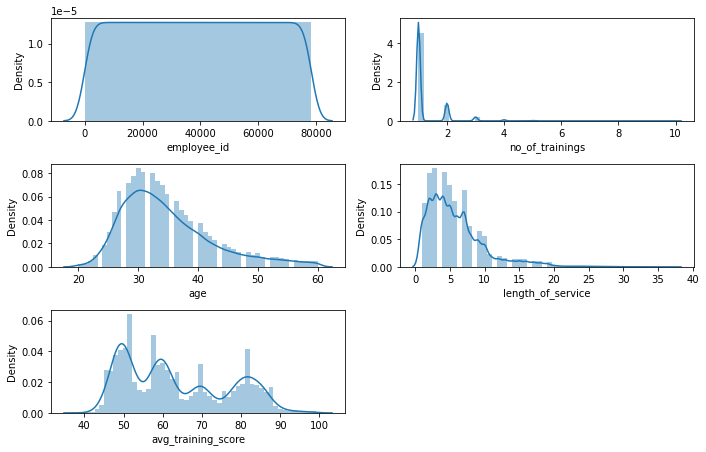

In [15]:
iterator=1
plt.figure(figsize=(10,10))
for i in num_cols:
    plt.subplot(5,2,iterator)
    sns.distplot(hr[i])
    iterator+=1
plt.tight_layout()
plt.show()

### Inference of univariate analysis ( Numeric cols. )

<font color='brown'>

* Employee ID is unique for every employee.
* Mostly employees have only 1 skill (No. of trainings).
* Maximum employees are from age 28 to 35 years.
* Maximum avg_training_score is between 45 to 55 and it is a multi-modal data and they scored       marks between 40 to 100.
* Mostly employees are working in the company for 2-5 years.

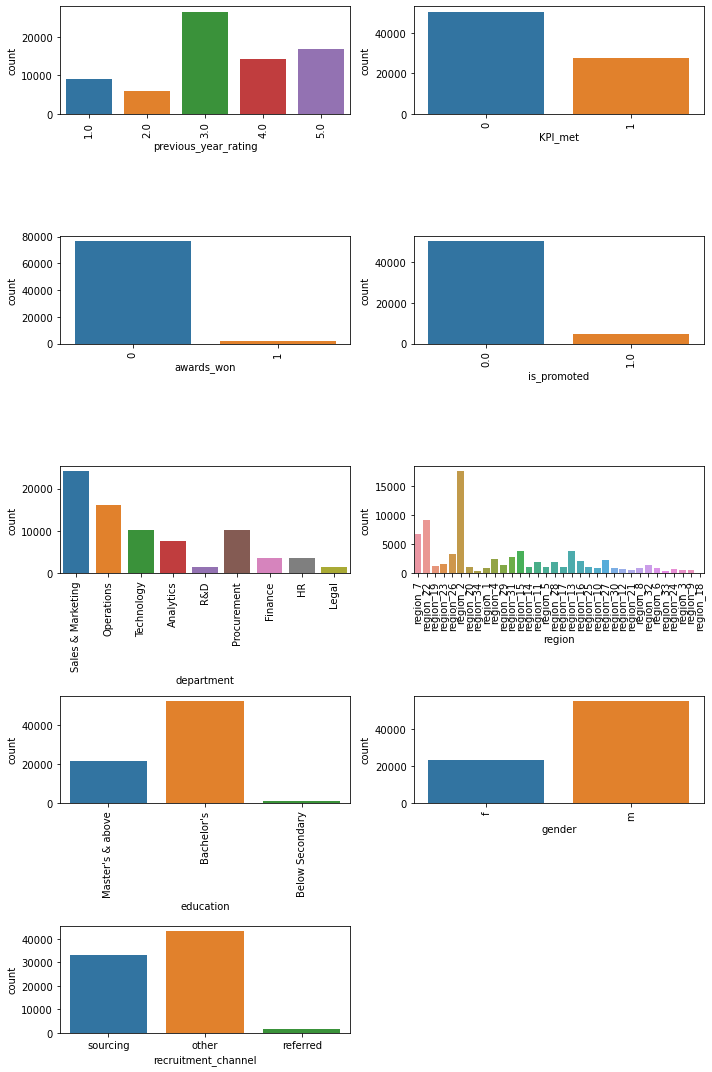

In [16]:
iterator=1
plt.figure(figsize=(10,15))
for i in cat_cols:
    plt.xticks(rotation=90)
    plt.subplot(5,2,iterator)
    sns.countplot(hr[i])
    iterator+=1
plt.tight_layout()
plt.show()

### Inference of categorical columns

<font color='brown'>

* Mostly employees are from Sales & Marketing, operations department and least employees work in Legal and R&D department.
* Maximum employees have not won any award.
* Maximum employees has not been promoted.
* Region 2 has the maximum number of count of employees.
* Most of the employees has not met the KPI means has KPI less than 80%
* Mostly employees has Bachlor's as their highest qualification.
* Maximum working employees are Male.
* Maximum recruitments is done through other way and least recruitments are done through           referrences.

## Bivariate Analysis

In [17]:
# We will perform Bivariate Analysis using our target variable

In [18]:
# CATEGORICAL VS NUMERICAL (TARGET VS NUMERICAL)

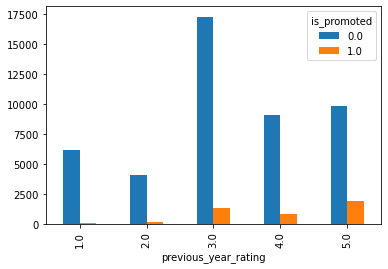

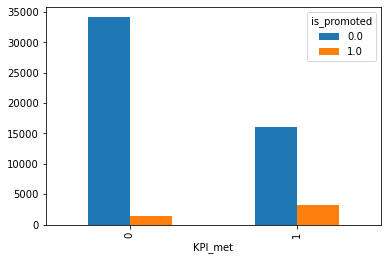

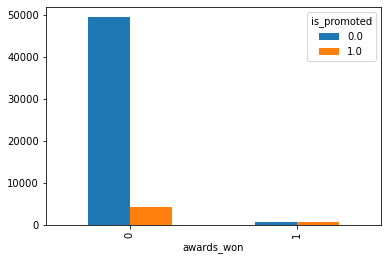

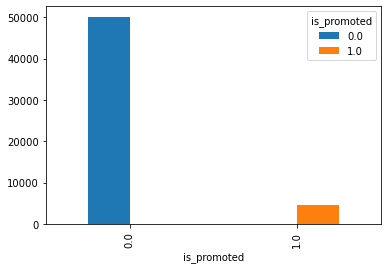

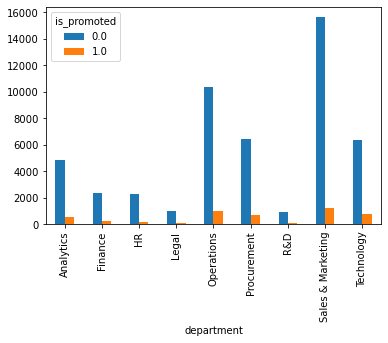

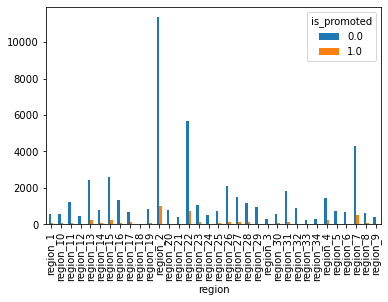

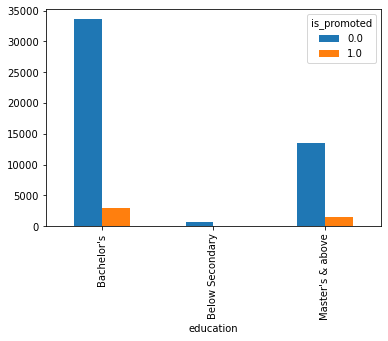

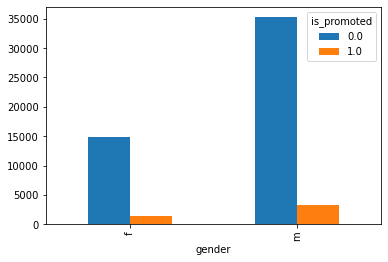

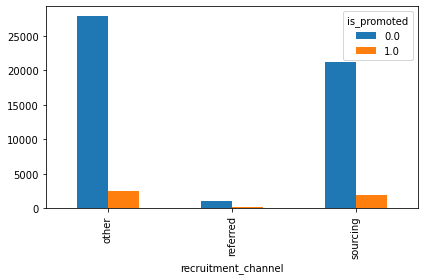

In [19]:
iterator=1
for i in cat_cols:
    pd.crosstab(hr[i],hr['is_promoted']).plot(kind='bar')
    iterator+=1
plt.tight_layout()
plt.show()

In [20]:
# Is their any effect of recruitment_channel on promotion

In [21]:
hr['recruitment_channel'].value_counts()

other       43524
sourcing    33181
referred     1593
Name: recruitment_channel, dtype: int64

In [22]:
other=hr[hr['recruitment_channel']=='other']['is_promoted']
sourcing=hr[hr['recruitment_channel']=='sourcing']['is_promoted']
ref=hr[hr['recruitment_channel']=='referred']['is_promoted']

In [23]:
stats.f_oneway(other,sourcing,ref)

F_onewayResult(statistic=nan, pvalue=nan)

### Missing Value Treatment

In [24]:
hr.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPI_met                     0
awards_won                  0
avg_training_score          0
is_promoted             23490
dtype: int64

In [25]:
hr[hr['education'].isnull()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_met,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0.0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0.0
32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0.0
43,17423,Sales & Marketing,region_2,NaN,m,other,3,24,2.0,2,0,0,48,0.0
82,66013,Sales & Marketing,region_2,NaN,m,sourcing,2,25,3.0,2,0,0,53,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78223,14036,Sales & Marketing,region_7,NaN,m,other,6,26,3.0,3,0,0,48,NaN
78232,5890,Analytics,region_15,NaN,m,sourcing,1,34,3.0,5,0,0,87,NaN
78260,65429,Analytics,region_15,NaN,m,sourcing,1,30,2.0,7,0,0,83,NaN
78267,30477,Sales & Marketing,region_22,NaN,m,other,1,31,2.0,7,0,0,52,NaN


In [26]:
hr

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_met,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


In [27]:
hr.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPI_met                     0
awards_won                  0
avg_training_score          0
is_promoted             23490
dtype: int64

In [28]:
hr['previous_year_rating'].mode()

0    3.0
Name: previous_year_rating, dtype: float64

In [29]:
hr['previous_year_rating']=np.where(hr['previous_year_rating'].isnull(),hr['previous_year_rating'].mode(),
         hr['previous_year_rating'])

In [30]:
hr.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPI_met                     0
awards_won                  0
avg_training_score          0
is_promoted             23490
dtype: int64

In [31]:
hr.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_met,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0


In [32]:
hr['education']=hr.groupby('department')['education'].apply(lambda x: x.fillna(x.mode()[0]))

In [33]:
hr.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPI_met                     0
awards_won                  0
avg_training_score          0
is_promoted             23490
dtype: int64

In [34]:
hr['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [35]:
hr['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [36]:
hr['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

<AxesSubplot:>

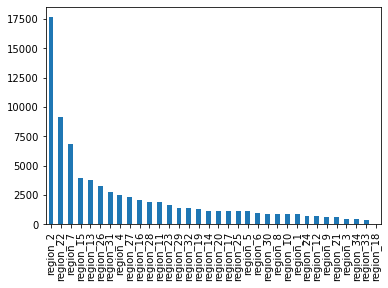

In [37]:
hr['region'].value_counts().plot(kind='bar')

In [38]:
reg=hr['region'].value_counts().to_dict()

In [39]:
hr['reg_count']=hr['region'].map(reg)

In [40]:
hr.head(4)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_met,awards_won,avg_training_score,is_promoted,reg_count
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,6825
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,9167
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,1284
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,1691


In [41]:
np.quantile(hr['reg_count'],0.33)

2055.0

In [42]:
np.quantile(hr['reg_count'],0.67)

9167.0

In [43]:
li=[]
for i in hr.reg_count:
    if i<2055:
        li.append('small office')
    elif i>9167:
        li.append('large office')
    else:
        li.append('medium office')
print(li)

['medium office', 'medium office', 'small office', 'small office', 'medium office', 'large office', 'small office', 'small office', 'small office', 'small office', 'small office', 'medium office', 'medium office', 'small office', 'large office', 'medium office', 'large office', 'medium office', 'medium office', 'medium office', 'small office', 'medium office', 'small office', 'small office', 'medium office', 'medium office', 'medium office', 'medium office', 'small office', 'medium office', 'medium office', 'medium office', 'medium office', 'large office', 'medium office', 'medium office', 'small office', 'medium office', 'small office', 'small office', 'medium office', 'large office', 'large office', 'large office', 'large office', 'small office', 'medium office', 'medium office', 'small office', 'large office', 'large office', 'small office', 'medium office', 'medium office', 'medium office', 'medium office', 'medium office', 'medium office', 'medium office', 'small office', 'medium 

In [44]:
d={k:v for (k,v) in zip(np.arange(0,78298),li)}

In [45]:
hr['reg_size']=hr.index.map(d)

In [46]:
hr.head(6)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_met,awards_won,avg_training_score,is_promoted,reg_count,reg_size
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,6825,medium office
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,9167,medium office
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,1284,small office
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,1691,small office
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,3271,medium office
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0.0,17642,large office


In [47]:
hr['gratuity']=np.where(hr['length_of_service']>5,1,0)

In [48]:
hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_met,awards_won,avg_training_score,is_promoted,reg_count,reg_size,gratuity
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,6825,medium office,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,9167,medium office,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,1284,small office,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,1691,small office,1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,3271,medium office,0


In [49]:
hr.drop(columns=['region','reg_count'],inplace=True)

## Statistics 

**Department VS Promotion**

In [50]:
# Is there any effect of department on promotion ?
x=pd.crosstab(hr['department'],hr['is_promoted'])
_,p,_,_=stats.chi2_contingency(x)
p


# We will reject the Ho:
# Their is an effect of department on promotions

9.882497107474632e-29

**Education VS Promotion**

In [51]:
# Is there any effect of education on promotion ?

y=pd.crosstab(hr['education'],hr['is_promoted'])
_,p,_,_=stats.chi2_contingency(y)
p

# Their is an effect of education on promotion

5.3808089671607115e-11

**Age VS Promotion**

In [52]:
# Is there any effect of age on promotion ?

x=hr[hr['is_promoted']==1]['age']
y=hr[hr['is_promoted']==0]['age']

In [53]:
stats.f_oneway(x,y)

# Age has an effect on promotion

F_onewayResult(statistic=16.154325642095483, pvalue=5.846304662318765e-05)

**Education VS Promotion**

In [54]:
# Is there any effect of education on promotion

_,p,_,_=stats.chi2_contingency(pd.crosstab(hr['education'],hr['is_promoted']))
p

# Education has an effect on promotion

5.3808089671607115e-11

**Gender VS Promotion**

In [55]:
# Is there any effect of gender on promotion

_,p,_,_=stats.chi2_contingency(pd.crosstab(hr['gender'],hr['is_promoted']))
p

# Gender effects the promotion

0.009765091521176657

**Recruitment VS Promotion**

In [56]:
# Is there any effect of recruitment_channel on promotion

stats.chi2_contingency(pd.crosstab(hr['recruitment_channel'],hr['is_promoted']))

# recruitment_channel has an effect on promotion

(19.23633518768639,
 6.650937825577018e-05,
 2,
 array([[27852.91271347,  2593.08728653],
        [ 1044.73580499,    97.26419501],
        [21242.35148154,  1977.64851846]]))

**No. of trainings VS Promotion**

In [57]:
# Is there any effect of no_of_trainings on promotion

_,p,_,_=stats.chi2_contingency(pd.crosstab(hr['no_of_trainings'],hr['is_promoted']))
p

# No_of_trainings has an effect on promotion

5.6462682173663955e-05

### Train Test Split

In [58]:
train.shape , test.shape

((54808, 14), (23490, 13))

In [59]:
newtrain= hr.loc[0:train.shape[0]-1,:]
newtest = hr.loc[train.shape[0]:,:]

In [60]:
newtrain

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_met,awards_won,avg_training_score,is_promoted,reg_size,gratuity
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,medium office,1
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,medium office,0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,small office,1
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,small office,1
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,medium office,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0.0,small office,1
54804,74592,Operations,Master's & above,f,other,1,37,2.0,6,0,0,56,0.0,medium office,1
54805,13918,Analytics,Bachelor's,m,other,1,27,5.0,3,1,0,79,0.0,small office,0
54806,13614,Sales & Marketing,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0.0,small office,0


In [61]:
newtrain

,employee_id,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_met,awards_won,avg_training_score,is_promoted,reg_size,gratuity
0,65438,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0,medium office,1
1,65141,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0,medium office,0
2,7513,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0,small office,1
3,2542,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0,small office,1
4,48945,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0,medium office,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0.0,small office,1
54804,74592,Operations,Master's & above,f,other,1,37,2.0,6,0,0,56,0.0,medium office,1
54805,13918,Analytics,Bachelor's,m,other,1,27,5.0,3,1,0,79,0.0,small office,0
54806,13614,Sales & Marketing,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0.0,small office,0


In [62]:
# Dropping Target Variable from Test dataset

X=newtrain.drop('is_promoted',axis=1)
newtest=newtest.drop('is_promoted',axis=1)
y=newtrain.is_promoted

In [63]:
X.shape, newtest.shape, y.shape

((54808, 14), (23490, 14), (54808,))

## Scaling and Encoding 

In [64]:
# Scaling Numerical Features

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
for i in X[num_cols]:
    X[i]=sc.fit_transform(pd.DataFrame(X[i]))
    newtest[i]=sc.transform(pd.DataFrame(newtest[i]))

In [65]:
X['previous_year_rating']=sc.fit_transform(pd.DataFrame(X['previous_year_rating']))
newtest['previous_year_rating']=sc.transform(pd.DataFrame(newtest['previous_year_rating']))

In [66]:
# Label Encoding on Education

newtrain.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [67]:
x={"Bachelor's":1,"Master's & above":2,"Below Secondary":0}

In [68]:
X['education']=X.education.map(x)
newtest['education']=newtest.education.map(x)

In [69]:
# Label Encoding on Department

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

X['department']=le.fit_transform(X.department)
newtest['department']=le.transform(newtest.department)

In [70]:
# Label Encoding on reg_size 

In [71]:
x={'small office':0,'medium office':1,'large office':2}

In [72]:
X['reg_size']=X.reg_size.map(x)
newtest['reg_size']=newtest.reg_size.map(x)

In [73]:
# Performing One-Hot Encoding

X=pd.get_dummies(X,drop_first=True)
newtest=pd.get_dummies(newtest,drop_first=True)

**Treating the imbalance in the target variable**

In [74]:
y.value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

* Here we can see the distribution of the target

* Now appling ADASYN to treat imbalance 

In [75]:
from imblearn.over_sampling import ADASYN

In [76]:
a=ADASYN()

In [77]:
X,y=a.fit_resample(X,y)

In [78]:
y.value_counts()

1.0    50905
0.0    50140
Name: is_promoted, dtype: int64

* Here we can see the difference

## Modelling

**First applying base model**

In [79]:
from statsmodels.api import add_constant, Logit

In [80]:
model=Logit(y,add_constant(X)).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.558853
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:               101045
Model:                          Logit   Df Residuals:                   101029
Method:                           MLE   Df Model:                           15
Date:                Sat, 29 Apr 2023   Pseudo R-squ.:                  0.1937
Time:                        09:21:36   Log-Likelihood:                -56469.
converged:                       True   LL-Null:                       -70036.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.5184      0.035    -14.919      0.000      -0.587      -0.450
employee_id                     -0.0083      0.007     -1.132      0.258      -0.023       0.006
department                       0.0666      0.003     22.512      0.000       0.061       0.072
education                       -0.2257      0.017    -12.931      0.000      -0.260      -0.192
no_of_trainings                 -0.1082      0.008    -13.054      0.000      -0.124      -0.092
age                             -0.0899      0.011     -7.894      0.000      -0.112      -0.068
previous_year_rating             0.4682      0.008     56.725      0.000       0.452       0.484
length_of_service                0.1405      0.014     10.118      0.000       0.113       0.168
KPI_met                          1.4837      0.015     97.165      0.000       1.454       1.514
awards_won                       0.8622      0.049     17.589      0.000       0.766       0.958
avg_training_score               0.6314      0.008     82.036      0.000       0.616       0.646
reg_size                        -0.1697      0.011    -15.172      0.000      -0.192      -0.148
gratuity                        -0.1523      0.023     -6.741      0.000      -0.197      -0.108
gender_m                        -0.1903      0.016    -12.218      0.000      -0.221      -0.160
recruitment_channel_referred    -1.3167      0.063    -20.750      0.000      -1.441      -1.192
recruitment_channel_sourcing    -0.4216      0.015    -28.000      0.000      -0.451      -0.392
================================================================================================
"""

In [81]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import catboost

**Logistic Regression Model**

In [82]:
lr=LogisticRegression()
y_pred=lr.fit(X,y).predict(newtest)

In [83]:
submission['is_promoted']=y_pred

In [84]:
submission['is_promoted']=submission['is_promoted'].astype('int')

In [85]:
submission.to_csv('logistic.csv',index=False)                # 0.29

**Gradient Boosting Model**

In [86]:
gbm=GradientBoostingClassifier()
y_pred=gbm.fit(X,y).predict(newtest)

In [87]:
submission['is_promoted']=y_pred

In [88]:
submission['is_promoted']=submission['is_promoted'].astype('int')

In [89]:
submission.to_csv('Gradient_boost.csv',index=False)        # 0.43

* The accuracy came out to be 0.43 for Gradient Boosting.

**Decision Tree Model**

In [90]:
dt=DecisionTreeClassifier()
y_pred=dt.fit(X,y).predict(newtest)

In [91]:
submission['is_promoted']=y_pred

In [92]:
submission['is_promoted']=submission['is_promoted'].astype('int')

In [93]:
submission.to_csv('Decision_tree.csv',index=False)        

* The accuracy came out to be 0.40 for Decision Tree.

**KNN Model**

In [94]:
knn=KNeighborsClassifier()
y_pred=knn.fit(X,y).predict(newtest)

In [95]:
submission['is_promoted']=y_pred

In [96]:
submission['is_promoted']=submission['is_promoted'].astype('int')

In [97]:
submission.to_csv('KNeighbour.csv',index=False)     

* The accuracy came out to be 0.20 for KNeighbor.

**Naive Bayes Model**

In [98]:
nb=GaussianNB()
y_pred=nb.fit(X,y).predict(newtest)

In [99]:
submission['is_promoted']=y_pred

In [100]:
submission['is_promoted']=submission['is_promoted'].astype('int')

In [101]:
submission.to_csv('Naive_Bayes.csv',index=False)    

* The accuracy came out to be 0.20 for Naive Bayes.

**Random Forest Model**

In [102]:
rf=RandomForestClassifier()
y_pred=rf.fit(X,y).predict(newtest)

In [103]:
submission['is_promoted']=y_pred

In [104]:
submission['is_promoted']=submission['is_promoted'].astype('int')

In [105]:
submission.to_csv('random_forest.csv',index=False)           # 0.41

* The accuracy came out to be 0.41 for Random Forest.

**AdaBoost Model**

In [106]:
ada=AdaBoostClassifier()
y_pred=ada.fit(X,y).predict(newtest)

In [107]:
submission['is_promoted']=y_pred

In [108]:
submission['is_promoted']=submission['is_promoted'].astype('int')

In [109]:
submission.to_csv('AdaBoost.csv',index=False) 

* The accuracy came out to be 0.25 for AdaBoost.

**CatBoost Model**

In [110]:
cat=catboost.CatBoostClassifier()
y_pred=cat.fit(X,y).predict(newtest)

Learning rate set to 0.073937
0:	learn: 0.6528798	total: 177ms	remaining: 2m 56s
1:	learn: 0.6274986	total: 225ms	remaining: 1m 52s
2:	learn: 0.6057498	total: 246ms	remaining: 1m 21s
3:	learn: 0.5793779	total: 269ms	remaining: 1m 7s
4:	learn: 0.5603961	total: 296ms	remaining: 58.9s
5:	learn: 0.5382069	total: 320ms	remaining: 53s
6:	learn: 0.5211760	total: 343ms	remaining: 48.7s
7:	learn: 0.5061411	total: 368ms	remaining: 45.6s
8:	learn: 0.4925660	total: 393ms	remaining: 43.2s
9:	learn: 0.4817482	total: 415ms	remaining: 41.1s
10:	learn: 0.4762562	total: 439ms	remaining: 39.5s
11:	learn: 0.4685708	total: 462ms	remaining: 38s
12:	learn: 0.4655095	total: 486ms	remaining: 36.9s
13:	learn: 0.4591909	total: 508ms	remaining: 35.8s
14:	learn: 0.4520651	total: 533ms	remaining: 35s
15:	learn: 0.4443067	total: 555ms	remaining: 34.1s
16:	learn: 0.4409997	total: 580ms	remaining: 33.6s
17:	learn: 0.4330154	total: 605ms	remaining: 33s
18:	learn: 0.4143650	total: 629ms	remaining: 32.5s
19:	learn: 0.411

165:	learn: 0.1505887	total: 5.57s	remaining: 28s
166:	learn: 0.1503792	total: 5.6s	remaining: 27.9s
167:	learn: 0.1498400	total: 5.62s	remaining: 27.9s
168:	learn: 0.1491648	total: 5.65s	remaining: 27.8s
169:	learn: 0.1490172	total: 5.68s	remaining: 27.7s
170:	learn: 0.1482300	total: 5.71s	remaining: 27.7s
171:	learn: 0.1476418	total: 5.73s	remaining: 27.6s
172:	learn: 0.1474467	total: 5.76s	remaining: 27.5s
173:	learn: 0.1471662	total: 5.79s	remaining: 27.5s
174:	learn: 0.1467478	total: 5.82s	remaining: 27.4s
175:	learn: 0.1464170	total: 5.84s	remaining: 27.4s
176:	learn: 0.1459007	total: 5.87s	remaining: 27.3s
177:	learn: 0.1453306	total: 5.9s	remaining: 27.2s
178:	learn: 0.1451727	total: 5.93s	remaining: 27.2s
179:	learn: 0.1447666	total: 5.95s	remaining: 27.1s
180:	learn: 0.1445279	total: 6.01s	remaining: 27.2s
181:	learn: 0.1444099	total: 6.05s	remaining: 27.2s
182:	learn: 0.1438844	total: 6.07s	remaining: 27.1s
183:	learn: 0.1435773	total: 6.1s	remaining: 27s
184:	learn: 0.14303

328:	learn: 0.1123367	total: 10.3s	remaining: 21.1s
329:	learn: 0.1123002	total: 10.3s	remaining: 21s
330:	learn: 0.1120837	total: 10.4s	remaining: 21s
331:	learn: 0.1120414	total: 10.4s	remaining: 21s
332:	learn: 0.1119526	total: 10.5s	remaining: 20.9s
333:	learn: 0.1119131	total: 10.5s	remaining: 20.9s
334:	learn: 0.1118529	total: 10.5s	remaining: 20.9s
335:	learn: 0.1118161	total: 10.6s	remaining: 20.9s
336:	learn: 0.1117753	total: 10.6s	remaining: 20.8s
337:	learn: 0.1116835	total: 10.6s	remaining: 20.8s
338:	learn: 0.1116195	total: 10.7s	remaining: 20.8s
339:	learn: 0.1114741	total: 10.7s	remaining: 20.8s
340:	learn: 0.1113924	total: 10.7s	remaining: 20.7s
341:	learn: 0.1112968	total: 10.8s	remaining: 20.7s
342:	learn: 0.1111321	total: 10.8s	remaining: 20.7s
343:	learn: 0.1109580	total: 10.9s	remaining: 20.7s
344:	learn: 0.1108919	total: 10.9s	remaining: 20.7s
345:	learn: 0.1108489	total: 10.9s	remaining: 20.6s
346:	learn: 0.1107665	total: 10.9s	remaining: 20.6s
347:	learn: 0.1106

489:	learn: 0.1007103	total: 15.2s	remaining: 15.8s
490:	learn: 0.1006548	total: 15.2s	remaining: 15.8s
491:	learn: 0.1005923	total: 15.3s	remaining: 15.8s
492:	learn: 0.1004130	total: 15.3s	remaining: 15.7s
493:	learn: 0.1003841	total: 15.4s	remaining: 15.8s
494:	learn: 0.1002944	total: 15.4s	remaining: 15.7s
495:	learn: 0.1002533	total: 15.4s	remaining: 15.7s
496:	learn: 0.1001747	total: 15.5s	remaining: 15.7s
497:	learn: 0.1001320	total: 15.6s	remaining: 15.7s
498:	learn: 0.1000901	total: 15.6s	remaining: 15.7s
499:	learn: 0.1000509	total: 15.6s	remaining: 15.6s
500:	learn: 0.1000242	total: 15.7s	remaining: 15.6s
501:	learn: 0.0999939	total: 15.7s	remaining: 15.6s
502:	learn: 0.0999511	total: 15.8s	remaining: 15.6s
503:	learn: 0.0999120	total: 15.8s	remaining: 15.6s
504:	learn: 0.0998769	total: 15.9s	remaining: 15.6s
505:	learn: 0.0998127	total: 16s	remaining: 15.6s
506:	learn: 0.0996671	total: 16s	remaining: 15.6s
507:	learn: 0.0996084	total: 16.1s	remaining: 15.6s
508:	learn: 0.09

648:	learn: 0.0934956	total: 23.3s	remaining: 12.6s
649:	learn: 0.0934447	total: 23.4s	remaining: 12.6s
650:	learn: 0.0934245	total: 23.5s	remaining: 12.6s
651:	learn: 0.0933993	total: 23.5s	remaining: 12.5s
652:	learn: 0.0933576	total: 23.5s	remaining: 12.5s
653:	learn: 0.0933276	total: 23.7s	remaining: 12.5s
654:	learn: 0.0932653	total: 23.7s	remaining: 12.5s
655:	learn: 0.0932430	total: 23.8s	remaining: 12.5s
656:	learn: 0.0932223	total: 23.8s	remaining: 12.4s
657:	learn: 0.0931974	total: 23.9s	remaining: 12.4s
658:	learn: 0.0931747	total: 23.9s	remaining: 12.4s
659:	learn: 0.0931005	total: 24s	remaining: 12.4s
660:	learn: 0.0930724	total: 24.1s	remaining: 12.4s
661:	learn: 0.0930455	total: 24.2s	remaining: 12.4s
662:	learn: 0.0929961	total: 24.2s	remaining: 12.3s
663:	learn: 0.0929343	total: 24.3s	remaining: 12.3s
664:	learn: 0.0929064	total: 24.3s	remaining: 12.2s
665:	learn: 0.0928921	total: 24.4s	remaining: 12.2s
666:	learn: 0.0928424	total: 24.4s	remaining: 12.2s
667:	learn: 0.

808:	learn: 0.0882358	total: 31.4s	remaining: 7.41s
809:	learn: 0.0882315	total: 31.4s	remaining: 7.37s
810:	learn: 0.0882071	total: 31.4s	remaining: 7.32s
811:	learn: 0.0881836	total: 31.5s	remaining: 7.29s
812:	learn: 0.0881608	total: 31.5s	remaining: 7.26s
813:	learn: 0.0881424	total: 31.6s	remaining: 7.22s
814:	learn: 0.0881312	total: 31.7s	remaining: 7.19s
815:	learn: 0.0881211	total: 31.7s	remaining: 7.16s
816:	learn: 0.0880747	total: 31.8s	remaining: 7.13s
817:	learn: 0.0880564	total: 31.9s	remaining: 7.1s
818:	learn: 0.0880398	total: 31.9s	remaining: 7.06s
819:	learn: 0.0880347	total: 32s	remaining: 7.03s
820:	learn: 0.0880061	total: 32.1s	remaining: 6.99s
821:	learn: 0.0879721	total: 32.2s	remaining: 6.96s
822:	learn: 0.0879451	total: 32.2s	remaining: 6.92s
823:	learn: 0.0879218	total: 32.3s	remaining: 6.89s
824:	learn: 0.0879060	total: 32.3s	remaining: 6.85s
825:	learn: 0.0878485	total: 32.4s	remaining: 6.82s
826:	learn: 0.0878166	total: 32.4s	remaining: 6.78s
827:	learn: 0.0

969:	learn: 0.0843276	total: 39.6s	remaining: 1.23s
970:	learn: 0.0843120	total: 39.7s	remaining: 1.19s
971:	learn: 0.0842948	total: 39.8s	remaining: 1.15s
972:	learn: 0.0842848	total: 39.8s	remaining: 1.1s
973:	learn: 0.0842173	total: 39.9s	remaining: 1.07s
974:	learn: 0.0842027	total: 40s	remaining: 1.02s
975:	learn: 0.0841769	total: 40.1s	remaining: 986ms
976:	learn: 0.0841300	total: 40.1s	remaining: 945ms
977:	learn: 0.0841134	total: 40.3s	remaining: 905ms
978:	learn: 0.0840934	total: 40.3s	remaining: 864ms
979:	learn: 0.0840657	total: 40.4s	remaining: 824ms
980:	learn: 0.0840305	total: 40.4s	remaining: 783ms
981:	learn: 0.0840107	total: 40.5s	remaining: 742ms
982:	learn: 0.0839813	total: 40.5s	remaining: 700ms
983:	learn: 0.0839579	total: 40.5s	remaining: 659ms
984:	learn: 0.0839461	total: 40.5s	remaining: 617ms
985:	learn: 0.0839127	total: 40.6s	remaining: 576ms
986:	learn: 0.0838939	total: 40.6s	remaining: 535ms
987:	learn: 0.0838684	total: 40.7s	remaining: 494ms
988:	learn: 0.0

In [111]:
submission['is_promoted']=y_pred

In [112]:
submission['is_promoted']=submission['is_promoted'].astype('int')

In [113]:
submission.to_csv('Catboost.csv',index=False)            # 0.48

* The model with best accuracy is CatBoost.
* Now we will tune the CatBoost Model and check its performance.

**Tuned Catboost Model**

In [114]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.09,0.1,0.2,0.3,0.4,0.5]}


grid= GridSearchCV(estimator=cat, param_grid=param_grid, scoring='neg_mean_squared_error' ,cv=3)
grid.fit(X,y)

0:	learn: 0.6466862	total: 31.8ms	remaining: 31.7s
1:	learn: 0.6071642	total: 100ms	remaining: 50s
2:	learn: 0.5833650	total: 131ms	remaining: 43.5s
3:	learn: 0.5604634	total: 158ms	remaining: 39.3s
4:	learn: 0.5433706	total: 181ms	remaining: 36s
5:	learn: 0.5241389	total: 211ms	remaining: 35s
6:	learn: 0.5085183	total: 278ms	remaining: 39.5s
7:	learn: 0.4952097	total: 312ms	remaining: 38.7s
8:	learn: 0.4845341	total: 338ms	remaining: 37.2s
9:	learn: 0.4723627	total: 361ms	remaining: 35.7s
10:	learn: 0.4638528	total: 429ms	remaining: 38.6s
11:	learn: 0.4527538	total: 490ms	remaining: 40.3s
12:	learn: 0.4360406	total: 518ms	remaining: 39.3s
13:	learn: 0.4276492	total: 540ms	remaining: 38s
14:	learn: 0.4215275	total: 598ms	remaining: 39.3s
15:	learn: 0.4109684	total: 645ms	remaining: 39.7s
16:	learn: 0.3947799	total: 673ms	remaining: 38.9s
17:	learn: 0.3699320	total: 709ms	remaining: 38.7s
18:	learn: 0.3519123	total: 783ms	remaining: 40.4s
19:	learn: 0.3367112	total: 820ms	remaining: 40.

164:	learn: 0.0727235	total: 6.62s	remaining: 33.5s
165:	learn: 0.0721024	total: 6.65s	remaining: 33.4s
166:	learn: 0.0717181	total: 6.67s	remaining: 33.3s
167:	learn: 0.0715336	total: 6.7s	remaining: 33.2s
168:	learn: 0.0709747	total: 6.77s	remaining: 33.3s
169:	learn: 0.0703810	total: 6.8s	remaining: 33.2s
170:	learn: 0.0697403	total: 6.83s	remaining: 33.1s
171:	learn: 0.0696321	total: 6.85s	remaining: 33s
172:	learn: 0.0690653	total: 6.9s	remaining: 33s
173:	learn: 0.0686166	total: 6.96s	remaining: 33.1s
174:	learn: 0.0677885	total: 7s	remaining: 33s
175:	learn: 0.0675973	total: 7.03s	remaining: 32.9s
176:	learn: 0.0670054	total: 7.1s	remaining: 33s
177:	learn: 0.0662523	total: 7.14s	remaining: 33s
178:	learn: 0.0658470	total: 7.17s	remaining: 32.9s
179:	learn: 0.0656447	total: 7.2s	remaining: 32.8s
180:	learn: 0.0655044	total: 7.23s	remaining: 32.7s
181:	learn: 0.0651953	total: 7.3s	remaining: 32.8s
182:	learn: 0.0642087	total: 7.34s	remaining: 32.8s
183:	learn: 0.0635296	total: 7.

323:	learn: 0.0331075	total: 13s	remaining: 27s
324:	learn: 0.0330409	total: 13s	remaining: 27s
325:	learn: 0.0328413	total: 13s	remaining: 26.9s
326:	learn: 0.0327171	total: 13.1s	remaining: 26.9s
327:	learn: 0.0325943	total: 13.1s	remaining: 26.9s
328:	learn: 0.0323340	total: 13.1s	remaining: 26.8s
329:	learn: 0.0322133	total: 13.2s	remaining: 26.7s
330:	learn: 0.0319166	total: 13.2s	remaining: 26.7s
331:	learn: 0.0318467	total: 13.3s	remaining: 26.7s
332:	learn: 0.0317499	total: 13.3s	remaining: 26.6s
333:	learn: 0.0316946	total: 13.3s	remaining: 26.6s
334:	learn: 0.0316214	total: 13.3s	remaining: 26.5s
335:	learn: 0.0315363	total: 13.4s	remaining: 26.4s
336:	learn: 0.0315155	total: 13.5s	remaining: 26.5s
337:	learn: 0.0313897	total: 13.5s	remaining: 26.5s
338:	learn: 0.0313035	total: 13.5s	remaining: 26.4s
339:	learn: 0.0312850	total: 13.6s	remaining: 26.4s
340:	learn: 0.0309799	total: 13.6s	remaining: 26.4s
341:	learn: 0.0309125	total: 13.7s	remaining: 26.3s
342:	learn: 0.0308741	

486:	learn: 0.0202671	total: 19.3s	remaining: 20.4s
487:	learn: 0.0202466	total: 19.4s	remaining: 20.3s
488:	learn: 0.0202249	total: 19.4s	remaining: 20.3s
489:	learn: 0.0201982	total: 19.5s	remaining: 20.3s
490:	learn: 0.0201647	total: 19.5s	remaining: 20.2s
491:	learn: 0.0200948	total: 19.5s	remaining: 20.2s
492:	learn: 0.0200800	total: 19.6s	remaining: 20.1s
493:	learn: 0.0200396	total: 19.6s	remaining: 20.1s
494:	learn: 0.0200102	total: 19.7s	remaining: 20.1s
495:	learn: 0.0199621	total: 19.7s	remaining: 20s
496:	learn: 0.0199104	total: 19.7s	remaining: 20s
497:	learn: 0.0198471	total: 19.8s	remaining: 19.9s
498:	learn: 0.0197774	total: 19.8s	remaining: 19.9s
499:	learn: 0.0197448	total: 19.9s	remaining: 19.9s
500:	learn: 0.0197068	total: 19.9s	remaining: 19.8s
501:	learn: 0.0196783	total: 20s	remaining: 19.8s
502:	learn: 0.0196257	total: 20s	remaining: 19.8s
503:	learn: 0.0195817	total: 20s	remaining: 19.7s
504:	learn: 0.0195138	total: 20.1s	remaining: 19.7s
505:	learn: 0.0194560	

645:	learn: 0.0146161	total: 25.8s	remaining: 14.2s
646:	learn: 0.0145855	total: 25.9s	remaining: 14.1s
647:	learn: 0.0145780	total: 25.9s	remaining: 14.1s
648:	learn: 0.0145511	total: 25.9s	remaining: 14s
649:	learn: 0.0145145	total: 26s	remaining: 14s
650:	learn: 0.0144866	total: 26s	remaining: 14s
651:	learn: 0.0144541	total: 26.1s	remaining: 13.9s
652:	learn: 0.0144540	total: 26.1s	remaining: 13.9s
653:	learn: 0.0144400	total: 26.2s	remaining: 13.8s
654:	learn: 0.0144279	total: 26.2s	remaining: 13.8s
655:	learn: 0.0144047	total: 26.2s	remaining: 13.7s
656:	learn: 0.0143924	total: 26.3s	remaining: 13.7s
657:	learn: 0.0143547	total: 26.4s	remaining: 13.7s
658:	learn: 0.0143227	total: 26.4s	remaining: 13.7s
659:	learn: 0.0142895	total: 26.4s	remaining: 13.6s
660:	learn: 0.0142454	total: 26.5s	remaining: 13.6s
661:	learn: 0.0142003	total: 26.5s	remaining: 13.5s
662:	learn: 0.0141764	total: 26.6s	remaining: 13.5s
663:	learn: 0.0141517	total: 26.6s	remaining: 13.4s
664:	learn: 0.0141200	

804:	learn: 0.0111736	total: 32.1s	remaining: 7.78s
805:	learn: 0.0111444	total: 32.1s	remaining: 7.73s
806:	learn: 0.0111159	total: 32.2s	remaining: 7.7s
807:	learn: 0.0110969	total: 32.2s	remaining: 7.66s
808:	learn: 0.0110833	total: 32.3s	remaining: 7.62s
809:	learn: 0.0110658	total: 32.3s	remaining: 7.57s
810:	learn: 0.0110486	total: 32.4s	remaining: 7.54s
811:	learn: 0.0110325	total: 32.4s	remaining: 7.5s
812:	learn: 0.0110079	total: 32.4s	remaining: 7.46s
813:	learn: 0.0109848	total: 32.5s	remaining: 7.42s
814:	learn: 0.0109606	total: 32.5s	remaining: 7.38s
815:	learn: 0.0109428	total: 32.5s	remaining: 7.34s
816:	learn: 0.0109428	total: 32.6s	remaining: 7.29s
817:	learn: 0.0109305	total: 32.6s	remaining: 7.25s
818:	learn: 0.0109056	total: 32.7s	remaining: 7.22s
819:	learn: 0.0109056	total: 32.7s	remaining: 7.18s
820:	learn: 0.0108957	total: 32.7s	remaining: 7.13s
821:	learn: 0.0108541	total: 32.8s	remaining: 7.1s
822:	learn: 0.0108515	total: 32.9s	remaining: 7.07s
823:	learn: 0.0

964:	learn: 0.0094175	total: 38.1s	remaining: 1.38s
965:	learn: 0.0094121	total: 38.1s	remaining: 1.34s
966:	learn: 0.0094011	total: 38.2s	remaining: 1.3s
967:	learn: 0.0093833	total: 38.2s	remaining: 1.26s
968:	learn: 0.0093682	total: 38.3s	remaining: 1.22s
969:	learn: 0.0093445	total: 38.3s	remaining: 1.18s
970:	learn: 0.0093350	total: 38.3s	remaining: 1.14s
971:	learn: 0.0093211	total: 38.4s	remaining: 1.1s
972:	learn: 0.0093211	total: 38.4s	remaining: 1.06s
973:	learn: 0.0093211	total: 38.4s	remaining: 1.02s
974:	learn: 0.0093181	total: 38.4s	remaining: 986ms
975:	learn: 0.0093180	total: 38.5s	remaining: 946ms
976:	learn: 0.0093180	total: 38.5s	remaining: 907ms
977:	learn: 0.0093180	total: 38.6s	remaining: 867ms
978:	learn: 0.0093180	total: 38.6s	remaining: 828ms
979:	learn: 0.0093180	total: 38.6s	remaining: 788ms
980:	learn: 0.0093179	total: 38.6s	remaining: 748ms
981:	learn: 0.0093148	total: 38.7s	remaining: 709ms
982:	learn: 0.0092885	total: 38.7s	remaining: 670ms
983:	learn: 0.

127:	learn: 0.1817988	total: 5.09s	remaining: 34.7s
128:	learn: 0.1813444	total: 5.12s	remaining: 34.6s
129:	learn: 0.1810841	total: 5.14s	remaining: 34.4s
130:	learn: 0.1809767	total: 5.18s	remaining: 34.3s
131:	learn: 0.1807803	total: 5.23s	remaining: 34.4s
132:	learn: 0.1799976	total: 5.26s	remaining: 34.3s
133:	learn: 0.1792980	total: 5.29s	remaining: 34.2s
134:	learn: 0.1788197	total: 5.31s	remaining: 34s
135:	learn: 0.1776958	total: 5.37s	remaining: 34.1s
136:	learn: 0.1769316	total: 5.42s	remaining: 34.2s
137:	learn: 0.1757180	total: 5.45s	remaining: 34s
138:	learn: 0.1740656	total: 5.47s	remaining: 33.9s
139:	learn: 0.1724788	total: 5.5s	remaining: 33.8s
140:	learn: 0.1715015	total: 5.57s	remaining: 33.9s
141:	learn: 0.1710596	total: 5.6s	remaining: 33.9s
142:	learn: 0.1697370	total: 5.63s	remaining: 33.7s
143:	learn: 0.1693047	total: 5.65s	remaining: 33.6s
144:	learn: 0.1689132	total: 5.69s	remaining: 33.5s
145:	learn: 0.1683878	total: 5.75s	remaining: 33.7s
146:	learn: 0.1680

290:	learn: 0.1343367	total: 11.5s	remaining: 27.9s
291:	learn: 0.1342424	total: 11.5s	remaining: 27.9s
292:	learn: 0.1341606	total: 11.5s	remaining: 27.8s
293:	learn: 0.1339301	total: 11.6s	remaining: 27.9s
294:	learn: 0.1337114	total: 11.7s	remaining: 27.9s
295:	learn: 0.1336211	total: 11.7s	remaining: 27.9s
296:	learn: 0.1335706	total: 11.7s	remaining: 27.8s
297:	learn: 0.1334967	total: 11.8s	remaining: 27.8s
298:	learn: 0.1334421	total: 11.9s	remaining: 27.8s
299:	learn: 0.1333952	total: 11.9s	remaining: 27.7s
300:	learn: 0.1332931	total: 11.9s	remaining: 27.6s
301:	learn: 0.1331812	total: 12s	remaining: 27.7s
302:	learn: 0.1330968	total: 12s	remaining: 27.7s
303:	learn: 0.1329906	total: 12.1s	remaining: 27.6s
304:	learn: 0.1328958	total: 12.1s	remaining: 27.5s
305:	learn: 0.1328181	total: 12.1s	remaining: 27.4s
306:	learn: 0.1326964	total: 12.1s	remaining: 27.4s
307:	learn: 0.1326332	total: 12.2s	remaining: 27.3s
308:	learn: 0.1325626	total: 12.2s	remaining: 27.3s
309:	learn: 0.13

453:	learn: 0.1196349	total: 17.9s	remaining: 21.6s
454:	learn: 0.1195691	total: 18s	remaining: 21.6s
455:	learn: 0.1195387	total: 18s	remaining: 21.5s
456:	learn: 0.1194932	total: 18s	remaining: 21.4s
457:	learn: 0.1194510	total: 18.1s	remaining: 21.4s
458:	learn: 0.1193859	total: 18.2s	remaining: 21.4s
459:	learn: 0.1193534	total: 18.2s	remaining: 21.3s
460:	learn: 0.1193302	total: 18.3s	remaining: 21.3s
461:	learn: 0.1192914	total: 18.3s	remaining: 21.3s
462:	learn: 0.1192576	total: 18.3s	remaining: 21.2s
463:	learn: 0.1192245	total: 18.3s	remaining: 21.2s
464:	learn: 0.1191686	total: 18.4s	remaining: 21.2s
465:	learn: 0.1191235	total: 18.4s	remaining: 21.1s
466:	learn: 0.1190507	total: 18.5s	remaining: 21.1s
467:	learn: 0.1189746	total: 18.5s	remaining: 21s
468:	learn: 0.1188833	total: 18.6s	remaining: 21s
469:	learn: 0.1188070	total: 18.6s	remaining: 21s
470:	learn: 0.1186997	total: 18.6s	remaining: 20.9s
471:	learn: 0.1185949	total: 18.7s	remaining: 20.9s
472:	learn: 0.1185252	to

614:	learn: 0.1111030	total: 24.5s	remaining: 15.4s
615:	learn: 0.1110742	total: 24.6s	remaining: 15.3s
616:	learn: 0.1110122	total: 24.6s	remaining: 15.3s
617:	learn: 0.1109630	total: 24.7s	remaining: 15.3s
618:	learn: 0.1109147	total: 24.7s	remaining: 15.2s
619:	learn: 0.1108831	total: 24.8s	remaining: 15.2s
620:	learn: 0.1108595	total: 24.8s	remaining: 15.1s
621:	learn: 0.1108193	total: 24.8s	remaining: 15.1s
622:	learn: 0.1107569	total: 24.9s	remaining: 15s
623:	learn: 0.1107175	total: 24.9s	remaining: 15s
624:	learn: 0.1106891	total: 24.9s	remaining: 15s
625:	learn: 0.1106594	total: 25s	remaining: 14.9s
626:	learn: 0.1106227	total: 25s	remaining: 14.9s
627:	learn: 0.1105959	total: 25.1s	remaining: 14.9s
628:	learn: 0.1105516	total: 25.1s	remaining: 14.8s
629:	learn: 0.1104515	total: 25.1s	remaining: 14.8s
630:	learn: 0.1104350	total: 25.2s	remaining: 14.7s
631:	learn: 0.1103828	total: 25.2s	remaining: 14.7s
632:	learn: 0.1103387	total: 25.3s	remaining: 14.6s
633:	learn: 0.1103092	

775:	learn: 0.1041850	total: 31.2s	remaining: 9.02s
776:	learn: 0.1041567	total: 31.3s	remaining: 8.97s
777:	learn: 0.1040987	total: 31.3s	remaining: 8.94s
778:	learn: 0.1040616	total: 31.4s	remaining: 8.9s
779:	learn: 0.1040120	total: 31.4s	remaining: 8.86s
780:	learn: 0.1039824	total: 31.4s	remaining: 8.81s
781:	learn: 0.1039498	total: 31.5s	remaining: 8.77s
782:	learn: 0.1039089	total: 31.5s	remaining: 8.74s
783:	learn: 0.1038726	total: 31.6s	remaining: 8.7s
784:	learn: 0.1038526	total: 31.6s	remaining: 8.65s
785:	learn: 0.1038256	total: 31.6s	remaining: 8.61s
786:	learn: 0.1038065	total: 31.6s	remaining: 8.56s
787:	learn: 0.1037802	total: 31.7s	remaining: 8.53s
788:	learn: 0.1037315	total: 31.7s	remaining: 8.49s
789:	learn: 0.1036974	total: 31.8s	remaining: 8.44s
790:	learn: 0.1036718	total: 31.8s	remaining: 8.4s
791:	learn: 0.1036298	total: 31.8s	remaining: 8.36s
792:	learn: 0.1035932	total: 31.9s	remaining: 8.33s
793:	learn: 0.1035486	total: 31.9s	remaining: 8.28s
794:	learn: 0.1

935:	learn: 0.0984459	total: 37.4s	remaining: 2.56s
936:	learn: 0.0984275	total: 37.5s	remaining: 2.52s
937:	learn: 0.0983596	total: 37.5s	remaining: 2.48s
938:	learn: 0.0983275	total: 37.6s	remaining: 2.44s
939:	learn: 0.0982911	total: 37.6s	remaining: 2.4s
940:	learn: 0.0982584	total: 37.7s	remaining: 2.36s
941:	learn: 0.0982088	total: 37.7s	remaining: 2.32s
942:	learn: 0.0981760	total: 37.7s	remaining: 2.28s
943:	learn: 0.0981268	total: 37.8s	remaining: 2.24s
944:	learn: 0.0980373	total: 37.8s	remaining: 2.2s
945:	learn: 0.0980138	total: 37.9s	remaining: 2.16s
946:	learn: 0.0979396	total: 37.9s	remaining: 2.12s
947:	learn: 0.0978981	total: 37.9s	remaining: 2.08s
948:	learn: 0.0978522	total: 37.9s	remaining: 2.04s
949:	learn: 0.0978313	total: 38s	remaining: 2s
950:	learn: 0.0978014	total: 38s	remaining: 1.96s
951:	learn: 0.0977853	total: 38.1s	remaining: 1.92s
952:	learn: 0.0977673	total: 38.1s	remaining: 1.88s
953:	learn: 0.0977222	total: 38.1s	remaining: 1.84s
954:	learn: 0.0976847

101:	learn: 0.2024235	total: 4.05s	remaining: 35.7s
102:	learn: 0.2013075	total: 4.08s	remaining: 35.5s
103:	learn: 0.2008182	total: 4.13s	remaining: 35.6s
104:	learn: 0.2003897	total: 4.19s	remaining: 35.7s
105:	learn: 0.1982440	total: 4.22s	remaining: 35.6s
106:	learn: 0.1976361	total: 4.24s	remaining: 35.4s
107:	learn: 0.1972298	total: 4.29s	remaining: 35.4s
108:	learn: 0.1959683	total: 4.35s	remaining: 35.6s
109:	learn: 0.1958163	total: 4.38s	remaining: 35.4s
110:	learn: 0.1950404	total: 4.41s	remaining: 35.3s
111:	learn: 0.1947502	total: 4.43s	remaining: 35.1s
112:	learn: 0.1944558	total: 4.47s	remaining: 35.1s
113:	learn: 0.1941934	total: 4.54s	remaining: 35.3s
114:	learn: 0.1932735	total: 4.57s	remaining: 35.1s
115:	learn: 0.1928784	total: 4.59s	remaining: 35s
116:	learn: 0.1920573	total: 4.61s	remaining: 34.8s
117:	learn: 0.1918730	total: 4.68s	remaining: 35s
118:	learn: 0.1908131	total: 4.72s	remaining: 35s
119:	learn: 0.1894171	total: 4.75s	remaining: 34.8s
120:	learn: 0.1890

888:	learn: 0.0101139	total: 34.5s	remaining: 4.3s
889:	learn: 0.0101138	total: 34.5s	remaining: 4.26s
890:	learn: 0.0101086	total: 34.5s	remaining: 4.22s
891:	learn: 0.0100999	total: 34.5s	remaining: 4.18s
892:	learn: 0.0100917	total: 34.6s	remaining: 4.14s
893:	learn: 0.0100917	total: 34.6s	remaining: 4.11s
894:	learn: 0.0100865	total: 34.7s	remaining: 4.07s
895:	learn: 0.0100619	total: 34.7s	remaining: 4.03s
896:	learn: 0.0100556	total: 34.7s	remaining: 3.99s
897:	learn: 0.0100145	total: 34.8s	remaining: 3.95s
898:	learn: 0.0099949	total: 34.8s	remaining: 3.91s
899:	learn: 0.0099818	total: 34.9s	remaining: 3.87s
900:	learn: 0.0099629	total: 34.9s	remaining: 3.83s
901:	learn: 0.0099320	total: 34.9s	remaining: 3.79s
902:	learn: 0.0099156	total: 35s	remaining: 3.76s
903:	learn: 0.0098963	total: 35s	remaining: 3.72s
904:	learn: 0.0098904	total: 35.1s	remaining: 3.68s
905:	learn: 0.0098795	total: 35.1s	remaining: 3.64s
906:	learn: 0.0098725	total: 35.1s	remaining: 3.6s
907:	learn: 0.0098

52:	learn: 0.2573965	total: 2.1s	remaining: 37.6s
53:	learn: 0.2569631	total: 2.13s	remaining: 37.3s
54:	learn: 0.2558652	total: 2.15s	remaining: 37s
55:	learn: 0.2489305	total: 2.21s	remaining: 37.2s
56:	learn: 0.2483666	total: 2.26s	remaining: 37.4s
57:	learn: 0.2474466	total: 2.29s	remaining: 37.1s
58:	learn: 0.2465489	total: 2.31s	remaining: 36.8s
59:	learn: 0.2450155	total: 2.38s	remaining: 37.3s
60:	learn: 0.2411680	total: 2.42s	remaining: 37.2s
61:	learn: 0.2403832	total: 2.45s	remaining: 37s
62:	learn: 0.2384411	total: 2.47s	remaining: 36.8s
63:	learn: 0.2361522	total: 2.5s	remaining: 36.5s
64:	learn: 0.2348271	total: 2.57s	remaining: 36.9s
65:	learn: 0.2338208	total: 2.6s	remaining: 36.8s
66:	learn: 0.2333119	total: 2.63s	remaining: 36.6s
67:	learn: 0.2330128	total: 2.65s	remaining: 36.3s
68:	learn: 0.2313959	total: 2.68s	remaining: 36.1s
69:	learn: 0.2292774	total: 2.75s	remaining: 36.5s
70:	learn: 0.2274370	total: 2.79s	remaining: 36.5s
71:	learn: 0.2263760	total: 2.82s	rema

214:	learn: 0.1424912	total: 8.4s	remaining: 30.7s
215:	learn: 0.1424033	total: 8.43s	remaining: 30.6s
216:	learn: 0.1423082	total: 8.46s	remaining: 30.5s
217:	learn: 0.1421950	total: 8.48s	remaining: 30.4s
218:	learn: 0.1420516	total: 8.53s	remaining: 30.4s
219:	learn: 0.1419216	total: 8.59s	remaining: 30.4s
220:	learn: 0.1417912	total: 8.62s	remaining: 30.4s
221:	learn: 0.1416849	total: 8.64s	remaining: 30.3s
222:	learn: 0.1415401	total: 8.66s	remaining: 30.2s
223:	learn: 0.1413730	total: 8.73s	remaining: 30.2s
224:	learn: 0.1411635	total: 8.77s	remaining: 30.2s
225:	learn: 0.1410995	total: 8.8s	remaining: 30.1s
226:	learn: 0.1409415	total: 8.83s	remaining: 30.1s
227:	learn: 0.1408103	total: 8.87s	remaining: 30s
228:	learn: 0.1407424	total: 8.93s	remaining: 30.1s
229:	learn: 0.1405742	total: 8.96s	remaining: 30s
230:	learn: 0.1404344	total: 8.99s	remaining: 29.9s
231:	learn: 0.1402181	total: 9.01s	remaining: 29.8s
232:	learn: 0.1401010	total: 9.07s	remaining: 29.8s
233:	learn: 0.1396

377:	learn: 0.1229124	total: 14.7s	remaining: 24.2s
378:	learn: 0.1228248	total: 14.7s	remaining: 24.1s
379:	learn: 0.1227264	total: 14.8s	remaining: 24.1s
380:	learn: 0.1226670	total: 14.8s	remaining: 24.1s
381:	learn: 0.1224186	total: 14.8s	remaining: 24s
382:	learn: 0.1222635	total: 14.9s	remaining: 23.9s
383:	learn: 0.1221807	total: 14.9s	remaining: 23.9s
384:	learn: 0.1220901	total: 15s	remaining: 23.9s
385:	learn: 0.1220196	total: 15s	remaining: 23.9s
386:	learn: 0.1219916	total: 15s	remaining: 23.8s
387:	learn: 0.1219282	total: 15s	remaining: 23.7s
388:	learn: 0.1218681	total: 15.1s	remaining: 23.7s
389:	learn: 0.1217861	total: 15.2s	remaining: 23.7s
390:	learn: 0.1217374	total: 15.2s	remaining: 23.7s
391:	learn: 0.1216709	total: 15.2s	remaining: 23.6s
392:	learn: 0.1216288	total: 15.3s	remaining: 23.6s
393:	learn: 0.1215945	total: 15.3s	remaining: 23.6s
394:	learn: 0.1215039	total: 15.3s	remaining: 23.5s
395:	learn: 0.1213957	total: 15.4s	remaining: 23.5s
396:	learn: 0.1213263	

540:	learn: 0.1122791	total: 21.2s	remaining: 18s
541:	learn: 0.1122370	total: 21.2s	remaining: 17.9s
542:	learn: 0.1121702	total: 21.2s	remaining: 17.8s
543:	learn: 0.1121479	total: 21.3s	remaining: 17.8s
544:	learn: 0.1121240	total: 21.3s	remaining: 17.8s
545:	learn: 0.1120924	total: 21.3s	remaining: 17.8s
546:	learn: 0.1120374	total: 21.4s	remaining: 17.7s
547:	learn: 0.1119913	total: 21.4s	remaining: 17.7s
548:	learn: 0.1119626	total: 21.5s	remaining: 17.7s
549:	learn: 0.1119170	total: 21.5s	remaining: 17.6s
550:	learn: 0.1118646	total: 21.5s	remaining: 17.6s
551:	learn: 0.1118031	total: 21.6s	remaining: 17.5s
552:	learn: 0.1117769	total: 21.6s	remaining: 17.5s
553:	learn: 0.1117338	total: 21.7s	remaining: 17.4s
554:	learn: 0.1116774	total: 21.7s	remaining: 17.4s
555:	learn: 0.1116404	total: 21.7s	remaining: 17.3s
556:	learn: 0.1115983	total: 21.8s	remaining: 17.3s
557:	learn: 0.1115259	total: 21.8s	remaining: 17.3s
558:	learn: 0.1114585	total: 21.9s	remaining: 17.2s
559:	learn: 0.

699:	learn: 0.1047495	total: 27.6s	remaining: 11.8s
700:	learn: 0.1047180	total: 27.6s	remaining: 11.8s
701:	learn: 0.1046808	total: 27.7s	remaining: 11.8s
702:	learn: 0.1046409	total: 27.7s	remaining: 11.7s
703:	learn: 0.1045511	total: 27.7s	remaining: 11.7s
704:	learn: 0.1045046	total: 27.8s	remaining: 11.6s
705:	learn: 0.1044637	total: 27.9s	remaining: 11.6s
706:	learn: 0.1044260	total: 27.9s	remaining: 11.6s
707:	learn: 0.1043875	total: 27.9s	remaining: 11.5s
708:	learn: 0.1043705	total: 28s	remaining: 11.5s
709:	learn: 0.1043412	total: 28s	remaining: 11.4s
710:	learn: 0.1042782	total: 28.1s	remaining: 11.4s
711:	learn: 0.1042447	total: 28.1s	remaining: 11.4s
712:	learn: 0.1042224	total: 28.2s	remaining: 11.3s
713:	learn: 0.1041725	total: 28.2s	remaining: 11.3s
714:	learn: 0.1041279	total: 28.3s	remaining: 11.3s
715:	learn: 0.1040839	total: 28.3s	remaining: 11.2s
716:	learn: 0.1040719	total: 28.3s	remaining: 11.2s
717:	learn: 0.1040221	total: 28.4s	remaining: 11.1s
718:	learn: 0.10

858:	learn: 0.0982654	total: 34.4s	remaining: 5.65s
859:	learn: 0.0982080	total: 34.5s	remaining: 5.61s
860:	learn: 0.0981878	total: 34.5s	remaining: 5.57s
861:	learn: 0.0981506	total: 34.5s	remaining: 5.53s
862:	learn: 0.0980993	total: 34.6s	remaining: 5.5s
863:	learn: 0.0980443	total: 34.6s	remaining: 5.45s
864:	learn: 0.0980002	total: 34.7s	remaining: 5.41s
865:	learn: 0.0979749	total: 34.7s	remaining: 5.37s
866:	learn: 0.0979671	total: 34.8s	remaining: 5.33s
867:	learn: 0.0979391	total: 34.8s	remaining: 5.29s
868:	learn: 0.0979007	total: 34.8s	remaining: 5.25s
869:	learn: 0.0978584	total: 34.9s	remaining: 5.22s
870:	learn: 0.0978373	total: 34.9s	remaining: 5.18s
871:	learn: 0.0977940	total: 35s	remaining: 5.13s
872:	learn: 0.0977225	total: 35s	remaining: 5.1s
873:	learn: 0.0976869	total: 35.1s	remaining: 5.06s
874:	learn: 0.0976516	total: 35.1s	remaining: 5.01s
875:	learn: 0.0976282	total: 35.2s	remaining: 4.99s
876:	learn: 0.0975841	total: 35.3s	remaining: 4.94s
877:	learn: 0.0975

21:	learn: 0.3468692	total: 679ms	remaining: 30.2s
22:	learn: 0.3454055	total: 727ms	remaining: 30.9s
23:	learn: 0.3347627	total: 753ms	remaining: 30.6s
24:	learn: 0.3270763	total: 781ms	remaining: 30.5s
25:	learn: 0.3247453	total: 850ms	remaining: 31.8s
26:	learn: 0.3211741	total: 878ms	remaining: 31.6s
27:	learn: 0.3198708	total: 904ms	remaining: 31.4s
28:	learn: 0.3157004	total: 1s	remaining: 33.6s
29:	learn: 0.3138370	total: 1.03s	remaining: 33.5s
30:	learn: 0.3115170	total: 1.06s	remaining: 33.1s
31:	learn: 0.3061815	total: 1.12s	remaining: 34s
32:	learn: 0.3009370	total: 1.16s	remaining: 34.1s
33:	learn: 0.2962204	total: 1.2s	remaining: 34.1s
34:	learn: 0.2928701	total: 1.27s	remaining: 35s
35:	learn: 0.2881897	total: 1.3s	remaining: 34.7s
36:	learn: 0.2869661	total: 1.32s	remaining: 34.4s
37:	learn: 0.2861357	total: 1.35s	remaining: 34.3s
38:	learn: 0.2821134	total: 1.42s	remaining: 34.9s
39:	learn: 0.2792831	total: 1.44s	remaining: 34.6s
40:	learn: 0.2752279	total: 1.46s	remain

186:	learn: 0.1496004	total: 7.28s	remaining: 31.7s
187:	learn: 0.1491185	total: 7.35s	remaining: 31.7s
188:	learn: 0.1488525	total: 7.38s	remaining: 31.7s
189:	learn: 0.1485441	total: 7.41s	remaining: 31.6s
190:	learn: 0.1481513	total: 7.45s	remaining: 31.6s
191:	learn: 0.1479841	total: 7.54s	remaining: 31.7s
192:	learn: 0.1472831	total: 7.57s	remaining: 31.6s
193:	learn: 0.1470498	total: 7.6s	remaining: 31.6s
194:	learn: 0.1469382	total: 7.67s	remaining: 31.6s
195:	learn: 0.1464717	total: 7.7s	remaining: 31.6s
196:	learn: 0.1461268	total: 7.72s	remaining: 31.5s
197:	learn: 0.1456404	total: 7.79s	remaining: 31.6s
198:	learn: 0.1454450	total: 7.84s	remaining: 31.6s
199:	learn: 0.1453130	total: 7.87s	remaining: 31.5s
200:	learn: 0.1449556	total: 7.89s	remaining: 31.4s
201:	learn: 0.1447785	total: 7.96s	remaining: 31.4s
202:	learn: 0.1445489	total: 8s	remaining: 31.4s
203:	learn: 0.1441849	total: 8.03s	remaining: 31.3s
204:	learn: 0.1439905	total: 8.06s	remaining: 31.3s
205:	learn: 0.143

345:	learn: 0.1257341	total: 14s	remaining: 26.4s
346:	learn: 0.1256831	total: 14.1s	remaining: 26.5s
347:	learn: 0.1255463	total: 14.1s	remaining: 26.4s
348:	learn: 0.1254912	total: 14.1s	remaining: 26.4s
349:	learn: 0.1252287	total: 14.2s	remaining: 26.4s
350:	learn: 0.1251426	total: 14.2s	remaining: 26.3s
351:	learn: 0.1250852	total: 14.3s	remaining: 26.3s
352:	learn: 0.1250391	total: 14.3s	remaining: 26.2s
353:	learn: 0.1249470	total: 14.4s	remaining: 26.2s
354:	learn: 0.1248748	total: 14.4s	remaining: 26.2s
355:	learn: 0.1247895	total: 14.4s	remaining: 26.1s
356:	learn: 0.1247345	total: 14.5s	remaining: 26.1s
357:	learn: 0.1246790	total: 14.5s	remaining: 26.1s
358:	learn: 0.1245187	total: 14.6s	remaining: 26s
359:	learn: 0.1244623	total: 14.6s	remaining: 26s
360:	learn: 0.1244082	total: 14.7s	remaining: 26s
361:	learn: 0.1243486	total: 14.7s	remaining: 26s
362:	learn: 0.1242942	total: 14.8s	remaining: 25.9s
363:	learn: 0.1242244	total: 14.8s	remaining: 25.9s
364:	learn: 0.1241702	

507:	learn: 0.1145644	total: 20.9s	remaining: 20.2s
508:	learn: 0.1145018	total: 20.9s	remaining: 20.2s
509:	learn: 0.1144593	total: 20.9s	remaining: 20.1s
510:	learn: 0.1144035	total: 21s	remaining: 20.1s
511:	learn: 0.1143875	total: 21s	remaining: 20s
512:	learn: 0.1143338	total: 21.1s	remaining: 20s
513:	learn: 0.1142779	total: 21.1s	remaining: 19.9s
514:	learn: 0.1142403	total: 21.1s	remaining: 19.9s
515:	learn: 0.1141628	total: 21.2s	remaining: 19.9s
516:	learn: 0.1140632	total: 21.2s	remaining: 19.8s
517:	learn: 0.1140200	total: 21.2s	remaining: 19.8s
518:	learn: 0.1139575	total: 21.3s	remaining: 19.7s
519:	learn: 0.1139278	total: 21.3s	remaining: 19.7s
520:	learn: 0.1138654	total: 21.4s	remaining: 19.6s
521:	learn: 0.1138142	total: 21.4s	remaining: 19.6s
522:	learn: 0.1137212	total: 21.5s	remaining: 19.6s
523:	learn: 0.1136597	total: 21.5s	remaining: 19.5s
524:	learn: 0.1136109	total: 21.5s	remaining: 19.5s
525:	learn: 0.1135609	total: 21.6s	remaining: 19.5s
526:	learn: 0.113512

670:	learn: 0.1064417	total: 27.4s	remaining: 13.5s
671:	learn: 0.1064173	total: 27.5s	remaining: 13.4s
672:	learn: 0.1063540	total: 27.6s	remaining: 13.4s
673:	learn: 0.1063299	total: 27.6s	remaining: 13.3s
674:	learn: 0.1062148	total: 27.6s	remaining: 13.3s
675:	learn: 0.1061778	total: 27.6s	remaining: 13.2s
676:	learn: 0.1061329	total: 27.7s	remaining: 13.2s
677:	learn: 0.1060781	total: 27.7s	remaining: 13.2s
678:	learn: 0.1059692	total: 27.8s	remaining: 13.1s
679:	learn: 0.1059450	total: 27.8s	remaining: 13.1s
680:	learn: 0.1058572	total: 27.8s	remaining: 13s
681:	learn: 0.1058001	total: 27.9s	remaining: 13s
682:	learn: 0.1057705	total: 27.9s	remaining: 13s
683:	learn: 0.1056984	total: 28s	remaining: 12.9s
684:	learn: 0.1056606	total: 28s	remaining: 12.9s
685:	learn: 0.1056255	total: 28.1s	remaining: 12.8s
686:	learn: 0.1055716	total: 28.1s	remaining: 12.8s
687:	learn: 0.1055164	total: 28.1s	remaining: 12.8s
688:	learn: 0.1054623	total: 28.1s	remaining: 12.7s
689:	learn: 0.1054400	

830:	learn: 0.0997015	total: 33.7s	remaining: 6.85s
831:	learn: 0.0996694	total: 33.7s	remaining: 6.81s
832:	learn: 0.0996424	total: 33.8s	remaining: 6.77s
833:	learn: 0.0996113	total: 33.8s	remaining: 6.73s
834:	learn: 0.0995664	total: 33.8s	remaining: 6.69s
835:	learn: 0.0995312	total: 33.9s	remaining: 6.65s
836:	learn: 0.0994875	total: 33.9s	remaining: 6.61s
837:	learn: 0.0994426	total: 34s	remaining: 6.56s
838:	learn: 0.0994121	total: 34s	remaining: 6.53s
839:	learn: 0.0993774	total: 34.1s	remaining: 6.49s
840:	learn: 0.0993449	total: 34.1s	remaining: 6.44s
841:	learn: 0.0993193	total: 34.1s	remaining: 6.4s
842:	learn: 0.0992420	total: 34.2s	remaining: 6.37s
843:	learn: 0.0991902	total: 34.2s	remaining: 6.33s
844:	learn: 0.0991393	total: 34.2s	remaining: 6.28s
845:	learn: 0.0990807	total: 34.3s	remaining: 6.25s
846:	learn: 0.0990610	total: 34.4s	remaining: 6.21s
847:	learn: 0.0990050	total: 34.4s	remaining: 6.16s
848:	learn: 0.0989842	total: 34.4s	remaining: 6.12s
849:	learn: 0.098

991:	learn: 0.0940762	total: 40.3s	remaining: 325ms
992:	learn: 0.0940496	total: 40.4s	remaining: 284ms
993:	learn: 0.0940217	total: 40.4s	remaining: 244ms
994:	learn: 0.0939977	total: 40.4s	remaining: 203ms
995:	learn: 0.0939758	total: 40.5s	remaining: 163ms
996:	learn: 0.0939411	total: 40.5s	remaining: 122ms
997:	learn: 0.0939243	total: 40.5s	remaining: 81.2ms
998:	learn: 0.0938882	total: 40.6s	remaining: 40.6ms
999:	learn: 0.0938524	total: 40.6s	remaining: 0us
0:	learn: 0.6009423	total: 37ms	remaining: 37s
1:	learn: 0.5415958	total: 75.7ms	remaining: 37.8s
2:	learn: 0.4987439	total: 136ms	remaining: 45.1s
3:	learn: 0.4712486	total: 176ms	remaining: 43.9s
4:	learn: 0.4594499	total: 207ms	remaining: 41.2s
5:	learn: 0.4412841	total: 240ms	remaining: 39.8s
6:	learn: 0.4085980	total: 274ms	remaining: 38.9s
7:	learn: 0.3945204	total: 315ms	remaining: 39.1s
8:	learn: 0.3474459	total: 449ms	remaining: 49.5s
9:	learn: 0.3266292	total: 474ms	remaining: 47s
10:	learn: 0.3111240	total: 531ms	re

157:	learn: 0.0279322	total: 6.1s	remaining: 32.5s
158:	learn: 0.0278314	total: 6.14s	remaining: 32.5s
159:	learn: 0.0277129	total: 6.18s	remaining: 32.5s
160:	learn: 0.0274434	total: 6.24s	remaining: 32.5s
161:	learn: 0.0273442	total: 6.27s	remaining: 32.4s
162:	learn: 0.0272457	total: 6.29s	remaining: 32.3s
163:	learn: 0.0271497	total: 6.33s	remaining: 32.3s
164:	learn: 0.0268753	total: 6.37s	remaining: 32.2s
165:	learn: 0.0267228	total: 6.4s	remaining: 32.2s
166:	learn: 0.0266165	total: 6.43s	remaining: 32.1s
167:	learn: 0.0263818	total: 6.47s	remaining: 32s
168:	learn: 0.0263239	total: 6.5s	remaining: 32s
169:	learn: 0.0262416	total: 6.54s	remaining: 31.9s
170:	learn: 0.0261293	total: 6.58s	remaining: 31.9s
171:	learn: 0.0259839	total: 6.61s	remaining: 31.8s
172:	learn: 0.0258573	total: 6.64s	remaining: 31.7s
173:	learn: 0.0257156	total: 6.71s	remaining: 31.8s
174:	learn: 0.0255587	total: 6.74s	remaining: 31.8s
175:	learn: 0.0254225	total: 6.77s	remaining: 31.7s
176:	learn: 0.02512

320:	learn: 0.0130772	total: 12.5s	remaining: 26.4s
321:	learn: 0.0130573	total: 12.5s	remaining: 26.3s
322:	learn: 0.0130087	total: 12.6s	remaining: 26.3s
323:	learn: 0.0129583	total: 12.6s	remaining: 26.3s
324:	learn: 0.0128757	total: 12.6s	remaining: 26.2s
325:	learn: 0.0128263	total: 12.7s	remaining: 26.2s
326:	learn: 0.0127846	total: 12.7s	remaining: 26.2s
327:	learn: 0.0127022	total: 12.7s	remaining: 26.1s
328:	learn: 0.0126384	total: 12.8s	remaining: 26s
329:	learn: 0.0126221	total: 12.8s	remaining: 26s
330:	learn: 0.0125786	total: 12.9s	remaining: 26s
331:	learn: 0.0125665	total: 12.9s	remaining: 26s
332:	learn: 0.0125438	total: 12.9s	remaining: 25.9s
333:	learn: 0.0124808	total: 13s	remaining: 25.9s
334:	learn: 0.0124326	total: 13s	remaining: 25.9s
335:	learn: 0.0123796	total: 13.1s	remaining: 25.8s
336:	learn: 0.0123351	total: 13.1s	remaining: 25.8s
337:	learn: 0.0122841	total: 13.2s	remaining: 25.8s
338:	learn: 0.0122580	total: 13.2s	remaining: 25.7s
339:	learn: 0.0122456	to

481:	learn: 0.0081315	total: 18.8s	remaining: 20.2s
482:	learn: 0.0081314	total: 18.9s	remaining: 20.2s
483:	learn: 0.0081179	total: 18.9s	remaining: 20.2s
484:	learn: 0.0081054	total: 19s	remaining: 20.1s
485:	learn: 0.0080803	total: 19s	remaining: 20.1s
486:	learn: 0.0080549	total: 19s	remaining: 20s
487:	learn: 0.0080276	total: 19s	remaining: 20s
488:	learn: 0.0079803	total: 19.1s	remaining: 19.9s
489:	learn: 0.0079480	total: 19.1s	remaining: 19.9s
490:	learn: 0.0079152	total: 19.2s	remaining: 19.9s
491:	learn: 0.0078812	total: 19.2s	remaining: 19.8s
492:	learn: 0.0078632	total: 19.2s	remaining: 19.8s
493:	learn: 0.0078468	total: 19.3s	remaining: 19.7s
494:	learn: 0.0078170	total: 19.3s	remaining: 19.7s
495:	learn: 0.0077912	total: 19.3s	remaining: 19.6s
496:	learn: 0.0077771	total: 19.4s	remaining: 19.6s
497:	learn: 0.0077529	total: 19.4s	remaining: 19.6s
498:	learn: 0.0077407	total: 19.4s	remaining: 19.5s
499:	learn: 0.0077406	total: 19.5s	remaining: 19.5s
500:	learn: 0.0077329	to

643:	learn: 0.0075315	total: 25.1s	remaining: 13.8s
644:	learn: 0.0075315	total: 25.1s	remaining: 13.8s
645:	learn: 0.0075315	total: 25.1s	remaining: 13.8s
646:	learn: 0.0075314	total: 25.2s	remaining: 13.7s
647:	learn: 0.0075314	total: 25.2s	remaining: 13.7s
648:	learn: 0.0075314	total: 25.2s	remaining: 13.6s
649:	learn: 0.0075313	total: 25.3s	remaining: 13.6s
650:	learn: 0.0075313	total: 25.3s	remaining: 13.5s
651:	learn: 0.0075313	total: 25.3s	remaining: 13.5s
652:	learn: 0.0075313	total: 25.4s	remaining: 13.5s
653:	learn: 0.0075313	total: 25.4s	remaining: 13.4s
654:	learn: 0.0075313	total: 25.4s	remaining: 13.4s
655:	learn: 0.0075312	total: 25.4s	remaining: 13.3s
656:	learn: 0.0075311	total: 25.5s	remaining: 13.3s
657:	learn: 0.0075310	total: 25.6s	remaining: 13.3s
658:	learn: 0.0075310	total: 25.6s	remaining: 13.2s
659:	learn: 0.0075309	total: 25.6s	remaining: 13.2s
660:	learn: 0.0075309	total: 25.6s	remaining: 13.1s
661:	learn: 0.0075309	total: 25.7s	remaining: 13.1s
662:	learn: 

804:	learn: 0.0071656	total: 29.9s	remaining: 7.25s
805:	learn: 0.0071656	total: 30s	remaining: 7.21s
806:	learn: 0.0071656	total: 30s	remaining: 7.17s
807:	learn: 0.0071656	total: 30s	remaining: 7.13s
808:	learn: 0.0071655	total: 30s	remaining: 7.09s
809:	learn: 0.0071655	total: 30.1s	remaining: 7.05s
810:	learn: 0.0071655	total: 30.1s	remaining: 7.02s
811:	learn: 0.0071654	total: 30.2s	remaining: 6.98s
812:	learn: 0.0071654	total: 30.2s	remaining: 6.94s
813:	learn: 0.0071653	total: 30.2s	remaining: 6.9s
814:	learn: 0.0071540	total: 30.3s	remaining: 6.87s
815:	learn: 0.0071501	total: 30.3s	remaining: 6.83s
816:	learn: 0.0071501	total: 30.3s	remaining: 6.79s
817:	learn: 0.0071501	total: 30.3s	remaining: 6.75s
818:	learn: 0.0071499	total: 30.4s	remaining: 6.71s
819:	learn: 0.0071498	total: 30.4s	remaining: 6.67s
820:	learn: 0.0071497	total: 30.4s	remaining: 6.63s
821:	learn: 0.0071497	total: 30.5s	remaining: 6.6s
822:	learn: 0.0071496	total: 30.5s	remaining: 6.56s
823:	learn: 0.0071495	

966:	learn: 0.0068144	total: 35.3s	remaining: 1.21s
967:	learn: 0.0068144	total: 35.4s	remaining: 1.17s
968:	learn: 0.0068144	total: 35.4s	remaining: 1.13s
969:	learn: 0.0068144	total: 35.4s	remaining: 1.09s
970:	learn: 0.0068144	total: 35.4s	remaining: 1.06s
971:	learn: 0.0068144	total: 35.5s	remaining: 1.02s
972:	learn: 0.0068144	total: 35.5s	remaining: 986ms
973:	learn: 0.0068144	total: 35.6s	remaining: 950ms
974:	learn: 0.0068144	total: 35.6s	remaining: 913ms
975:	learn: 0.0068144	total: 35.6s	remaining: 876ms
976:	learn: 0.0068144	total: 35.7s	remaining: 840ms
977:	learn: 0.0068144	total: 35.7s	remaining: 803ms
978:	learn: 0.0068144	total: 35.7s	remaining: 766ms
979:	learn: 0.0068144	total: 35.7s	remaining: 729ms
980:	learn: 0.0068144	total: 35.8s	remaining: 693ms
981:	learn: 0.0068144	total: 35.8s	remaining: 657ms
982:	learn: 0.0068144	total: 35.9s	remaining: 620ms
983:	learn: 0.0068144	total: 35.9s	remaining: 584ms
984:	learn: 0.0068144	total: 35.9s	remaining: 547ms
985:	learn: 

128:	learn: 0.1362061	total: 5.57s	remaining: 37.6s
129:	learn: 0.1359108	total: 5.62s	remaining: 37.6s
130:	learn: 0.1348656	total: 5.64s	remaining: 37.5s
131:	learn: 0.1345226	total: 5.68s	remaining: 37.3s
132:	learn: 0.1341976	total: 5.75s	remaining: 37.5s
133:	learn: 0.1338581	total: 5.78s	remaining: 37.4s
134:	learn: 0.1336911	total: 5.8s	remaining: 37.2s
135:	learn: 0.1333747	total: 5.85s	remaining: 37.2s
136:	learn: 0.1330975	total: 5.91s	remaining: 37.2s
137:	learn: 0.1328167	total: 5.94s	remaining: 37.1s
138:	learn: 0.1326007	total: 5.97s	remaining: 37s
139:	learn: 0.1324317	total: 6.04s	remaining: 37.1s
140:	learn: 0.1321890	total: 6.07s	remaining: 37s
141:	learn: 0.1319128	total: 6.09s	remaining: 36.8s
142:	learn: 0.1316077	total: 6.13s	remaining: 36.7s
143:	learn: 0.1313410	total: 6.22s	remaining: 37s
144:	learn: 0.1312323	total: 6.28s	remaining: 37.1s
145:	learn: 0.1311388	total: 6.32s	remaining: 37s
146:	learn: 0.1309760	total: 6.35s	remaining: 36.8s
147:	learn: 0.1307527

292:	learn: 0.1090346	total: 12.4s	remaining: 29.8s
293:	learn: 0.1089857	total: 12.4s	remaining: 29.8s
294:	learn: 0.1088573	total: 12.5s	remaining: 29.8s
295:	learn: 0.1087620	total: 12.5s	remaining: 29.7s
296:	learn: 0.1086694	total: 12.5s	remaining: 29.6s
297:	learn: 0.1085288	total: 12.6s	remaining: 29.6s
298:	learn: 0.1083948	total: 12.6s	remaining: 29.6s
299:	learn: 0.1083063	total: 12.6s	remaining: 29.5s
300:	learn: 0.1081762	total: 12.7s	remaining: 29.4s
301:	learn: 0.1081132	total: 12.7s	remaining: 29.4s
302:	learn: 0.1079727	total: 12.8s	remaining: 29.4s
303:	learn: 0.1078656	total: 12.8s	remaining: 29.3s
304:	learn: 0.1077583	total: 12.8s	remaining: 29.3s
305:	learn: 0.1076578	total: 12.9s	remaining: 29.3s
306:	learn: 0.1075420	total: 12.9s	remaining: 29.2s
307:	learn: 0.1074289	total: 13s	remaining: 29.2s
308:	learn: 0.1073258	total: 13s	remaining: 29.1s
309:	learn: 0.1072532	total: 13s	remaining: 29s
310:	learn: 0.1071369	total: 13.1s	remaining: 29s
311:	learn: 0.1070457	

451:	learn: 0.0963405	total: 18.8s	remaining: 22.8s
452:	learn: 0.0962659	total: 18.8s	remaining: 22.7s
453:	learn: 0.0962264	total: 18.8s	remaining: 22.6s
454:	learn: 0.0961663	total: 18.9s	remaining: 22.6s
455:	learn: 0.0961388	total: 18.9s	remaining: 22.6s
456:	learn: 0.0961024	total: 19s	remaining: 22.5s
457:	learn: 0.0960089	total: 19s	remaining: 22.5s
458:	learn: 0.0959539	total: 19s	remaining: 22.4s
459:	learn: 0.0958815	total: 19.1s	remaining: 22.4s
460:	learn: 0.0958333	total: 19.1s	remaining: 22.4s
461:	learn: 0.0957532	total: 19.2s	remaining: 22.3s
462:	learn: 0.0957044	total: 19.2s	remaining: 22.3s
463:	learn: 0.0956441	total: 19.3s	remaining: 22.3s
464:	learn: 0.0955429	total: 19.3s	remaining: 22.2s
465:	learn: 0.0954611	total: 19.3s	remaining: 22.1s
466:	learn: 0.0951460	total: 19.3s	remaining: 22.1s
467:	learn: 0.0950944	total: 19.4s	remaining: 22.1s
468:	learn: 0.0950458	total: 19.5s	remaining: 22s
469:	learn: 0.0949582	total: 19.5s	remaining: 22s
470:	learn: 0.0948889	

610:	learn: 0.0863489	total: 25.1s	remaining: 16s
611:	learn: 0.0862896	total: 25.1s	remaining: 15.9s
612:	learn: 0.0862299	total: 25.2s	remaining: 15.9s
613:	learn: 0.0861867	total: 25.2s	remaining: 15.9s
614:	learn: 0.0860971	total: 25.3s	remaining: 15.8s
615:	learn: 0.0860073	total: 25.3s	remaining: 15.8s
616:	learn: 0.0859774	total: 25.3s	remaining: 15.7s
617:	learn: 0.0859388	total: 25.4s	remaining: 15.7s
618:	learn: 0.0858952	total: 25.4s	remaining: 15.6s
619:	learn: 0.0858093	total: 25.5s	remaining: 15.6s
620:	learn: 0.0857778	total: 25.5s	remaining: 15.5s
621:	learn: 0.0856908	total: 25.5s	remaining: 15.5s
622:	learn: 0.0856379	total: 25.6s	remaining: 15.5s
623:	learn: 0.0855824	total: 25.6s	remaining: 15.4s
624:	learn: 0.0855284	total: 25.6s	remaining: 15.4s
625:	learn: 0.0854865	total: 25.7s	remaining: 15.3s
626:	learn: 0.0854441	total: 25.8s	remaining: 15.3s
627:	learn: 0.0853766	total: 25.8s	remaining: 15.3s
628:	learn: 0.0853013	total: 25.8s	remaining: 15.2s
629:	learn: 0.

771:	learn: 0.0784544	total: 31.5s	remaining: 9.3s
772:	learn: 0.0784241	total: 31.5s	remaining: 9.25s
773:	learn: 0.0783807	total: 31.5s	remaining: 9.21s
774:	learn: 0.0783193	total: 31.6s	remaining: 9.17s
775:	learn: 0.0782454	total: 31.6s	remaining: 9.13s
776:	learn: 0.0781985	total: 31.7s	remaining: 9.09s
777:	learn: 0.0781547	total: 31.7s	remaining: 9.05s
778:	learn: 0.0781076	total: 31.7s	remaining: 9s
779:	learn: 0.0780759	total: 31.8s	remaining: 8.97s
780:	learn: 0.0780247	total: 31.8s	remaining: 8.93s
781:	learn: 0.0779627	total: 31.9s	remaining: 8.88s
782:	learn: 0.0779151	total: 31.9s	remaining: 8.84s
783:	learn: 0.0778837	total: 31.9s	remaining: 8.8s
784:	learn: 0.0778462	total: 32s	remaining: 8.76s
785:	learn: 0.0778095	total: 32s	remaining: 8.72s
786:	learn: 0.0777991	total: 32.1s	remaining: 8.68s
787:	learn: 0.0777720	total: 32.1s	remaining: 8.63s
788:	learn: 0.0777601	total: 32.1s	remaining: 8.59s
789:	learn: 0.0777151	total: 32.2s	remaining: 8.55s
790:	learn: 0.0776539

932:	learn: 0.0712272	total: 37.5s	remaining: 2.7s
933:	learn: 0.0711864	total: 37.6s	remaining: 2.65s
934:	learn: 0.0711624	total: 37.6s	remaining: 2.62s
935:	learn: 0.0711378	total: 37.7s	remaining: 2.58s
936:	learn: 0.0711039	total: 37.7s	remaining: 2.54s
937:	learn: 0.0710900	total: 37.7s	remaining: 2.49s
938:	learn: 0.0710260	total: 37.8s	remaining: 2.46s
939:	learn: 0.0709864	total: 37.9s	remaining: 2.42s
940:	learn: 0.0709588	total: 37.9s	remaining: 2.37s
941:	learn: 0.0709375	total: 37.9s	remaining: 2.34s
942:	learn: 0.0709057	total: 38s	remaining: 2.29s
943:	learn: 0.0708893	total: 38s	remaining: 2.25s
944:	learn: 0.0708487	total: 38s	remaining: 2.21s
945:	learn: 0.0708181	total: 38.1s	remaining: 2.17s
946:	learn: 0.0707836	total: 38.1s	remaining: 2.13s
947:	learn: 0.0707227	total: 38.2s	remaining: 2.09s
948:	learn: 0.0706967	total: 38.2s	remaining: 2.05s
949:	learn: 0.0706417	total: 38.3s	remaining: 2.01s
950:	learn: 0.0706051	total: 38.3s	remaining: 1.97s
951:	learn: 0.07056

93:	learn: 0.1473860	total: 4.06s	remaining: 39.1s
94:	learn: 0.1465945	total: 4.11s	remaining: 39.2s
95:	learn: 0.1463174	total: 4.14s	remaining: 39s
96:	learn: 0.1460078	total: 4.17s	remaining: 38.8s
97:	learn: 0.1457932	total: 4.23s	remaining: 38.9s
98:	learn: 0.1447279	total: 4.28s	remaining: 38.9s
99:	learn: 0.1444248	total: 4.3s	remaining: 38.7s
100:	learn: 0.1439613	total: 4.33s	remaining: 38.6s
101:	learn: 0.1433373	total: 4.4s	remaining: 38.7s
102:	learn: 0.1428949	total: 4.44s	remaining: 38.6s
103:	learn: 0.1425832	total: 4.51s	remaining: 38.9s
104:	learn: 0.1423289	total: 4.56s	remaining: 38.9s
105:	learn: 0.1421145	total: 4.59s	remaining: 38.7s
106:	learn: 0.1417609	total: 4.61s	remaining: 38.5s
107:	learn: 0.1410169	total: 4.68s	remaining: 38.6s
108:	learn: 0.1405502	total: 4.73s	remaining: 38.6s
109:	learn: 0.1403530	total: 4.75s	remaining: 38.4s
110:	learn: 0.1399140	total: 4.82s	remaining: 38.6s
111:	learn: 0.1397089	total: 4.86s	remaining: 38.5s
112:	learn: 0.1394294	t

253:	learn: 0.1134899	total: 10.8s	remaining: 31.7s
254:	learn: 0.1133672	total: 10.8s	remaining: 31.6s
255:	learn: 0.1132283	total: 10.8s	remaining: 31.5s
256:	learn: 0.1131299	total: 10.9s	remaining: 31.5s
257:	learn: 0.1129988	total: 10.9s	remaining: 31.5s
258:	learn: 0.1129866	total: 11s	remaining: 31.4s
259:	learn: 0.1129038	total: 11.1s	remaining: 31.5s
260:	learn: 0.1127851	total: 11.1s	remaining: 31.4s
261:	learn: 0.1126956	total: 11.1s	remaining: 31.3s
262:	learn: 0.1125621	total: 11.2s	remaining: 31.4s
263:	learn: 0.1124575	total: 11.2s	remaining: 31.3s
264:	learn: 0.1123143	total: 11.2s	remaining: 31.2s
265:	learn: 0.1121955	total: 11.3s	remaining: 31.1s
266:	learn: 0.1121178	total: 11.3s	remaining: 31.1s
267:	learn: 0.1120211	total: 11.4s	remaining: 31.1s
268:	learn: 0.1119507	total: 11.4s	remaining: 31s
269:	learn: 0.1118551	total: 11.4s	remaining: 30.9s
270:	learn: 0.1117352	total: 11.5s	remaining: 30.9s
271:	learn: 0.1116557	total: 11.5s	remaining: 30.8s
272:	learn: 0.11

416:	learn: 0.0985009	total: 17.7s	remaining: 24.7s
417:	learn: 0.0984227	total: 17.7s	remaining: 24.7s
418:	learn: 0.0983471	total: 17.7s	remaining: 24.6s
419:	learn: 0.0982494	total: 17.8s	remaining: 24.6s
420:	learn: 0.0981811	total: 17.8s	remaining: 24.5s
421:	learn: 0.0981506	total: 17.9s	remaining: 24.5s
422:	learn: 0.0980706	total: 17.9s	remaining: 24.4s
423:	learn: 0.0980055	total: 18s	remaining: 24.4s
424:	learn: 0.0979994	total: 18s	remaining: 24.4s
425:	learn: 0.0979478	total: 18s	remaining: 24.3s
426:	learn: 0.0978835	total: 18.1s	remaining: 24.3s
427:	learn: 0.0978112	total: 18.1s	remaining: 24.2s
428:	learn: 0.0977442	total: 18.2s	remaining: 24.2s
429:	learn: 0.0976609	total: 18.2s	remaining: 24.1s
430:	learn: 0.0975894	total: 18.3s	remaining: 24.1s
431:	learn: 0.0975037	total: 18.3s	remaining: 24.1s
432:	learn: 0.0974385	total: 18.3s	remaining: 24s
433:	learn: 0.0973653	total: 18.4s	remaining: 24s
434:	learn: 0.0973102	total: 18.4s	remaining: 23.9s
435:	learn: 0.0972261	

580:	learn: 0.0882937	total: 24.3s	remaining: 17.5s
581:	learn: 0.0882270	total: 24.3s	remaining: 17.5s
582:	learn: 0.0881857	total: 24.4s	remaining: 17.4s
583:	learn: 0.0881281	total: 24.4s	remaining: 17.4s
584:	learn: 0.0881094	total: 24.4s	remaining: 17.3s
585:	learn: 0.0880417	total: 24.5s	remaining: 17.3s
586:	learn: 0.0879961	total: 24.6s	remaining: 17.3s
587:	learn: 0.0879405	total: 24.6s	remaining: 17.2s
588:	learn: 0.0878786	total: 24.6s	remaining: 17.2s
589:	learn: 0.0878256	total: 24.7s	remaining: 17.2s
590:	learn: 0.0877879	total: 24.7s	remaining: 17.1s
591:	learn: 0.0877050	total: 24.7s	remaining: 17.1s
592:	learn: 0.0876569	total: 24.8s	remaining: 17s
593:	learn: 0.0876146	total: 24.8s	remaining: 17s
594:	learn: 0.0875467	total: 24.8s	remaining: 16.9s
595:	learn: 0.0875159	total: 24.9s	remaining: 16.9s
596:	learn: 0.0874747	total: 24.9s	remaining: 16.8s
597:	learn: 0.0873946	total: 24.9s	remaining: 16.8s
598:	learn: 0.0873746	total: 25s	remaining: 16.7s
599:	learn: 0.0873

742:	learn: 0.0801208	total: 30.7s	remaining: 10.6s
743:	learn: 0.0800798	total: 30.7s	remaining: 10.6s
744:	learn: 0.0800254	total: 30.7s	remaining: 10.5s
745:	learn: 0.0799663	total: 30.8s	remaining: 10.5s
746:	learn: 0.0798992	total: 30.8s	remaining: 10.4s
747:	learn: 0.0798398	total: 30.9s	remaining: 10.4s
748:	learn: 0.0797818	total: 30.9s	remaining: 10.4s
749:	learn: 0.0797199	total: 31s	remaining: 10.3s
750:	learn: 0.0796668	total: 31s	remaining: 10.3s
751:	learn: 0.0796253	total: 31s	remaining: 10.2s
752:	learn: 0.0795450	total: 31.1s	remaining: 10.2s
753:	learn: 0.0794990	total: 31.1s	remaining: 10.1s
754:	learn: 0.0794373	total: 31.1s	remaining: 10.1s
755:	learn: 0.0793778	total: 31.2s	remaining: 10.1s
756:	learn: 0.0793396	total: 31.2s	remaining: 10s
757:	learn: 0.0792946	total: 31.3s	remaining: 9.99s
758:	learn: 0.0792664	total: 31.3s	remaining: 9.94s
759:	learn: 0.0792120	total: 31.3s	remaining: 9.9s
760:	learn: 0.0791930	total: 31.4s	remaining: 9.85s
761:	learn: 0.0791577

904:	learn: 0.0726215	total: 36.9s	remaining: 3.87s
905:	learn: 0.0726013	total: 36.9s	remaining: 3.83s
906:	learn: 0.0725697	total: 37s	remaining: 3.8s
907:	learn: 0.0725517	total: 37.1s	remaining: 3.75s
908:	learn: 0.0725498	total: 37.1s	remaining: 3.71s
909:	learn: 0.0725156	total: 37.1s	remaining: 3.67s
910:	learn: 0.0724774	total: 37.1s	remaining: 3.63s
911:	learn: 0.0724260	total: 37.2s	remaining: 3.58s
912:	learn: 0.0723725	total: 37.2s	remaining: 3.54s
913:	learn: 0.0723393	total: 37.2s	remaining: 3.5s
914:	learn: 0.0723172	total: 37.3s	remaining: 3.46s
915:	learn: 0.0722762	total: 37.3s	remaining: 3.42s
916:	learn: 0.0722097	total: 37.4s	remaining: 3.38s
917:	learn: 0.0721859	total: 37.4s	remaining: 3.34s
918:	learn: 0.0721366	total: 37.4s	remaining: 3.3s
919:	learn: 0.0720112	total: 37.5s	remaining: 3.26s
920:	learn: 0.0719703	total: 37.5s	remaining: 3.22s
921:	learn: 0.0719402	total: 37.5s	remaining: 3.17s
922:	learn: 0.0719105	total: 37.6s	remaining: 3.13s
923:	learn: 0.071

69:	learn: 0.0431255	total: 3.04s	remaining: 40.4s
70:	learn: 0.0423570	total: 3.07s	remaining: 40.2s
71:	learn: 0.0420491	total: 3.1s	remaining: 40s
72:	learn: 0.0416093	total: 3.13s	remaining: 39.8s
73:	learn: 0.0412975	total: 3.16s	remaining: 39.5s
74:	learn: 0.0409268	total: 3.19s	remaining: 39.4s
75:	learn: 0.0402178	total: 3.22s	remaining: 39.2s
76:	learn: 0.0396355	total: 3.26s	remaining: 39s
77:	learn: 0.0394207	total: 3.29s	remaining: 38.8s
78:	learn: 0.0392167	total: 3.32s	remaining: 38.7s
79:	learn: 0.0390261	total: 3.36s	remaining: 38.6s
80:	learn: 0.0385625	total: 3.4s	remaining: 38.5s
81:	learn: 0.0381087	total: 3.43s	remaining: 38.4s
82:	learn: 0.0376179	total: 3.5s	remaining: 38.7s
83:	learn: 0.0372463	total: 3.54s	remaining: 38.6s
84:	learn: 0.0363679	total: 3.64s	remaining: 39.2s
85:	learn: 0.0354785	total: 3.66s	remaining: 38.9s
86:	learn: 0.0352096	total: 3.69s	remaining: 38.7s
87:	learn: 0.0349562	total: 3.76s	remaining: 39s
88:	learn: 0.0347526	total: 3.79s	remain

231:	learn: 0.0110856	total: 9.85s	remaining: 32.6s
232:	learn: 0.0110072	total: 9.92s	remaining: 32.7s
233:	learn: 0.0109632	total: 9.96s	remaining: 32.6s
234:	learn: 0.0109258	total: 10s	remaining: 32.6s
235:	learn: 0.0108936	total: 10.1s	remaining: 32.6s
236:	learn: 0.0107874	total: 10.2s	remaining: 32.8s
237:	learn: 0.0107569	total: 10.2s	remaining: 32.7s
238:	learn: 0.0106452	total: 10.2s	remaining: 32.6s
239:	learn: 0.0106058	total: 10.3s	remaining: 32.7s
240:	learn: 0.0106058	total: 10.3s	remaining: 32.6s
241:	learn: 0.0105489	total: 10.4s	remaining: 32.5s
242:	learn: 0.0104839	total: 10.4s	remaining: 32.6s
243:	learn: 0.0104387	total: 10.5s	remaining: 32.5s
244:	learn: 0.0103696	total: 10.5s	remaining: 32.4s
245:	learn: 0.0103062	total: 10.6s	remaining: 32.4s
246:	learn: 0.0102413	total: 10.6s	remaining: 32.4s
247:	learn: 0.0102413	total: 10.6s	remaining: 32.3s
248:	learn: 0.0102411	total: 10.7s	remaining: 32.1s
249:	learn: 0.0102410	total: 10.7s	remaining: 32s
250:	learn: 0.01

395:	learn: 0.0079753	total: 16s	remaining: 24.4s
396:	learn: 0.0079752	total: 16s	remaining: 24.3s
397:	learn: 0.0079381	total: 16.1s	remaining: 24.3s
398:	learn: 0.0078851	total: 16.1s	remaining: 24.3s
399:	learn: 0.0078757	total: 16.2s	remaining: 24.2s
400:	learn: 0.0078757	total: 16.2s	remaining: 24.2s
401:	learn: 0.0078756	total: 16.2s	remaining: 24.1s
402:	learn: 0.0078756	total: 16.2s	remaining: 24s
403:	learn: 0.0078756	total: 16.3s	remaining: 24s
404:	learn: 0.0078756	total: 16.3s	remaining: 24s
405:	learn: 0.0078755	total: 16.3s	remaining: 23.9s
406:	learn: 0.0078755	total: 16.4s	remaining: 23.8s
407:	learn: 0.0078755	total: 16.4s	remaining: 23.8s
408:	learn: 0.0078755	total: 16.4s	remaining: 23.7s
409:	learn: 0.0078254	total: 16.5s	remaining: 23.7s
410:	learn: 0.0077725	total: 16.5s	remaining: 23.7s
411:	learn: 0.0077406	total: 16.5s	remaining: 23.6s
412:	learn: 0.0076877	total: 16.6s	remaining: 23.5s
413:	learn: 0.0076159	total: 16.7s	remaining: 23.6s
414:	learn: 0.0075796	

554:	learn: 0.0062904	total: 21.8s	remaining: 17.5s
555:	learn: 0.0062751	total: 21.9s	remaining: 17.5s
556:	learn: 0.0062318	total: 21.9s	remaining: 17.4s
557:	learn: 0.0061566	total: 21.9s	remaining: 17.4s
558:	learn: 0.0061566	total: 22s	remaining: 17.4s
559:	learn: 0.0061214	total: 22.1s	remaining: 17.3s
560:	learn: 0.0061213	total: 22.1s	remaining: 17.3s
561:	learn: 0.0061204	total: 22.1s	remaining: 17.3s
562:	learn: 0.0061204	total: 22.2s	remaining: 17.2s
563:	learn: 0.0061202	total: 22.2s	remaining: 17.2s
564:	learn: 0.0061202	total: 22.3s	remaining: 17.1s
565:	learn: 0.0061202	total: 22.3s	remaining: 17.1s
566:	learn: 0.0061201	total: 22.3s	remaining: 17.1s
567:	learn: 0.0061193	total: 22.4s	remaining: 17s
568:	learn: 0.0061179	total: 22.4s	remaining: 17s
569:	learn: 0.0061177	total: 22.5s	remaining: 16.9s
570:	learn: 0.0061177	total: 22.5s	remaining: 16.9s
571:	learn: 0.0061176	total: 22.5s	remaining: 16.8s
572:	learn: 0.0061168	total: 22.6s	remaining: 16.8s
573:	learn: 0.0061

715:	learn: 0.0057191	total: 27.8s	remaining: 11s
716:	learn: 0.0057191	total: 27.8s	remaining: 11s
717:	learn: 0.0057191	total: 27.8s	remaining: 10.9s
718:	learn: 0.0057190	total: 27.8s	remaining: 10.9s
719:	learn: 0.0056991	total: 27.9s	remaining: 10.8s
720:	learn: 0.0056990	total: 27.9s	remaining: 10.8s
721:	learn: 0.0056988	total: 27.9s	remaining: 10.7s
722:	learn: 0.0056988	total: 27.9s	remaining: 10.7s
723:	learn: 0.0056987	total: 28s	remaining: 10.7s
724:	learn: 0.0056942	total: 28s	remaining: 10.6s
725:	learn: 0.0056941	total: 28.1s	remaining: 10.6s
726:	learn: 0.0056941	total: 28.1s	remaining: 10.5s
727:	learn: 0.0056940	total: 28.1s	remaining: 10.5s
728:	learn: 0.0056940	total: 28.1s	remaining: 10.5s
729:	learn: 0.0056938	total: 28.2s	remaining: 10.4s
730:	learn: 0.0056937	total: 28.2s	remaining: 10.4s
731:	learn: 0.0056937	total: 28.3s	remaining: 10.3s
732:	learn: 0.0056937	total: 28.3s	remaining: 10.3s
733:	learn: 0.0056936	total: 28.3s	remaining: 10.3s
734:	learn: 0.005693

877:	learn: 0.0054438	total: 33.7s	remaining: 4.68s
878:	learn: 0.0054438	total: 33.7s	remaining: 4.64s
879:	learn: 0.0054438	total: 33.7s	remaining: 4.6s
880:	learn: 0.0054438	total: 33.7s	remaining: 4.56s
881:	learn: 0.0054437	total: 33.8s	remaining: 4.52s
882:	learn: 0.0054437	total: 33.8s	remaining: 4.47s
883:	learn: 0.0054436	total: 33.8s	remaining: 4.43s
884:	learn: 0.0054435	total: 33.8s	remaining: 4.39s
885:	learn: 0.0054435	total: 33.8s	remaining: 4.35s
886:	learn: 0.0054434	total: 33.9s	remaining: 4.31s
887:	learn: 0.0054434	total: 33.9s	remaining: 4.28s
888:	learn: 0.0054434	total: 33.9s	remaining: 4.24s
889:	learn: 0.0054434	total: 34s	remaining: 4.2s
890:	learn: 0.0054433	total: 34s	remaining: 4.16s
891:	learn: 0.0054433	total: 34s	remaining: 4.12s
892:	learn: 0.0054433	total: 34.1s	remaining: 4.08s
893:	learn: 0.0054432	total: 34.1s	remaining: 4.04s
894:	learn: 0.0054432	total: 34.1s	remaining: 4s
895:	learn: 0.0054432	total: 34.1s	remaining: 3.96s
896:	learn: 0.0054432	t

40:	learn: 0.1792326	total: 1.73s	remaining: 40.4s
41:	learn: 0.1766288	total: 1.75s	remaining: 40s
42:	learn: 0.1735742	total: 1.78s	remaining: 39.7s
43:	learn: 0.1722498	total: 1.85s	remaining: 40.2s
44:	learn: 0.1704883	total: 1.88s	remaining: 39.9s
45:	learn: 0.1679188	total: 1.9s	remaining: 39.5s
46:	learn: 0.1662843	total: 1.94s	remaining: 39.3s
47:	learn: 0.1648982	total: 2s	remaining: 39.7s
48:	learn: 0.1642727	total: 2.03s	remaining: 39.5s
49:	learn: 0.1637080	total: 2.06s	remaining: 39.2s
50:	learn: 0.1628428	total: 2.08s	remaining: 38.8s
51:	learn: 0.1604369	total: 2.12s	remaining: 38.6s
52:	learn: 0.1581383	total: 2.18s	remaining: 39s
53:	learn: 0.1572923	total: 2.21s	remaining: 38.7s
54:	learn: 0.1561471	total: 2.24s	remaining: 38.4s
55:	learn: 0.1556623	total: 2.26s	remaining: 38.1s
56:	learn: 0.1544710	total: 2.31s	remaining: 38.2s
57:	learn: 0.1540095	total: 2.37s	remaining: 38.4s
58:	learn: 0.1535484	total: 2.4s	remaining: 38.3s
59:	learn: 0.1522994	total: 2.42s	remain

203:	learn: 0.1073530	total: 7.96s	remaining: 31.1s
204:	learn: 0.1071818	total: 8.01s	remaining: 31s
205:	learn: 0.1070444	total: 8.04s	remaining: 31s
206:	learn: 0.1068672	total: 8.07s	remaining: 30.9s
207:	learn: 0.1067508	total: 8.11s	remaining: 30.9s
208:	learn: 0.1065813	total: 8.15s	remaining: 30.8s
209:	learn: 0.1064096	total: 8.2s	remaining: 30.8s
210:	learn: 0.1061802	total: 8.23s	remaining: 30.8s
211:	learn: 0.1060731	total: 8.26s	remaining: 30.7s
212:	learn: 0.1059425	total: 8.3s	remaining: 30.7s
213:	learn: 0.1057979	total: 8.33s	remaining: 30.6s
214:	learn: 0.1057564	total: 8.37s	remaining: 30.6s
215:	learn: 0.1055983	total: 8.42s	remaining: 30.5s
216:	learn: 0.1053986	total: 8.48s	remaining: 30.6s
217:	learn: 0.1052336	total: 8.51s	remaining: 30.5s
218:	learn: 0.1050867	total: 8.55s	remaining: 30.5s
219:	learn: 0.1049289	total: 8.58s	remaining: 30.4s
220:	learn: 0.1047862	total: 8.63s	remaining: 30.4s
221:	learn: 0.1047196	total: 8.71s	remaining: 30.5s
222:	learn: 0.1046

363:	learn: 0.0903531	total: 15s	remaining: 26.2s
364:	learn: 0.0902507	total: 15s	remaining: 26.2s
365:	learn: 0.0901705	total: 15.1s	remaining: 26.2s
366:	learn: 0.0901204	total: 15.1s	remaining: 26.1s
367:	learn: 0.0900681	total: 15.2s	remaining: 26s
368:	learn: 0.0899863	total: 15.2s	remaining: 26s
369:	learn: 0.0899728	total: 15.2s	remaining: 26s
370:	learn: 0.0898546	total: 15.3s	remaining: 25.9s
371:	learn: 0.0897927	total: 15.3s	remaining: 25.9s
372:	learn: 0.0896801	total: 15.4s	remaining: 25.9s
373:	learn: 0.0895746	total: 15.5s	remaining: 25.9s
374:	learn: 0.0895190	total: 15.5s	remaining: 25.8s
375:	learn: 0.0894528	total: 15.6s	remaining: 25.9s
376:	learn: 0.0893828	total: 15.6s	remaining: 25.8s
377:	learn: 0.0892747	total: 15.7s	remaining: 25.9s
378:	learn: 0.0892294	total: 15.7s	remaining: 25.8s
379:	learn: 0.0890716	total: 15.8s	remaining: 25.7s
380:	learn: 0.0890319	total: 15.8s	remaining: 25.7s
381:	learn: 0.0889044	total: 15.9s	remaining: 25.7s
382:	learn: 0.0888108	

525:	learn: 0.0772115	total: 22.1s	remaining: 19.9s
526:	learn: 0.0770959	total: 22.1s	remaining: 19.8s
527:	learn: 0.0770117	total: 22.1s	remaining: 19.8s
528:	learn: 0.0769496	total: 22.2s	remaining: 19.8s
529:	learn: 0.0768778	total: 22.3s	remaining: 19.7s
530:	learn: 0.0768174	total: 22.3s	remaining: 19.7s
531:	learn: 0.0767446	total: 22.4s	remaining: 19.7s
532:	learn: 0.0766928	total: 22.4s	remaining: 19.6s
533:	learn: 0.0766063	total: 22.4s	remaining: 19.6s
534:	learn: 0.0765053	total: 22.5s	remaining: 19.5s
535:	learn: 0.0764376	total: 22.5s	remaining: 19.5s
536:	learn: 0.0763841	total: 22.6s	remaining: 19.4s
537:	learn: 0.0762441	total: 22.6s	remaining: 19.4s
538:	learn: 0.0761231	total: 22.6s	remaining: 19.4s
539:	learn: 0.0760583	total: 22.7s	remaining: 19.3s
540:	learn: 0.0759904	total: 22.7s	remaining: 19.3s
541:	learn: 0.0759085	total: 22.8s	remaining: 19.2s
542:	learn: 0.0758094	total: 22.8s	remaining: 19.2s
543:	learn: 0.0757532	total: 22.9s	remaining: 19.2s
544:	learn: 

687:	learn: 0.0672545	total: 28.6s	remaining: 13s
688:	learn: 0.0672122	total: 28.7s	remaining: 12.9s
689:	learn: 0.0671585	total: 28.7s	remaining: 12.9s
690:	learn: 0.0670770	total: 28.7s	remaining: 12.8s
691:	learn: 0.0670425	total: 28.8s	remaining: 12.8s
692:	learn: 0.0669782	total: 28.8s	remaining: 12.8s
693:	learn: 0.0669261	total: 28.9s	remaining: 12.7s
694:	learn: 0.0668838	total: 28.9s	remaining: 12.7s
695:	learn: 0.0668534	total: 28.9s	remaining: 12.6s
696:	learn: 0.0667954	total: 29s	remaining: 12.6s
697:	learn: 0.0667688	total: 29s	remaining: 12.6s
698:	learn: 0.0667049	total: 29.1s	remaining: 12.5s
699:	learn: 0.0666548	total: 29.1s	remaining: 12.5s
700:	learn: 0.0666036	total: 29.2s	remaining: 12.4s
701:	learn: 0.0665543	total: 29.2s	remaining: 12.4s
702:	learn: 0.0664648	total: 29.2s	remaining: 12.3s
703:	learn: 0.0663957	total: 29.3s	remaining: 12.3s
704:	learn: 0.0663452	total: 29.3s	remaining: 12.3s
705:	learn: 0.0662720	total: 29.4s	remaining: 12.2s
706:	learn: 0.0662

850:	learn: 0.0590313	total: 35.4s	remaining: 6.19s
851:	learn: 0.0589849	total: 35.4s	remaining: 6.15s
852:	learn: 0.0589245	total: 35.4s	remaining: 6.11s
853:	learn: 0.0588575	total: 35.5s	remaining: 6.06s
854:	learn: 0.0588260	total: 35.5s	remaining: 6.03s
855:	learn: 0.0587407	total: 35.6s	remaining: 5.98s
856:	learn: 0.0586844	total: 35.6s	remaining: 5.94s
857:	learn: 0.0586288	total: 35.6s	remaining: 5.89s
858:	learn: 0.0585754	total: 35.7s	remaining: 5.85s
859:	learn: 0.0585280	total: 35.7s	remaining: 5.82s
860:	learn: 0.0584881	total: 35.8s	remaining: 5.77s
861:	learn: 0.0584365	total: 35.8s	remaining: 5.73s
862:	learn: 0.0583403	total: 35.8s	remaining: 5.68s
863:	learn: 0.0582991	total: 35.9s	remaining: 5.65s
864:	learn: 0.0582870	total: 35.9s	remaining: 5.61s
865:	learn: 0.0582539	total: 36s	remaining: 5.56s
866:	learn: 0.0582021	total: 36s	remaining: 5.52s
867:	learn: 0.0581568	total: 36s	remaining: 5.48s
868:	learn: 0.0581287	total: 36.1s	remaining: 5.44s
869:	learn: 0.0580

11:	learn: 0.2782541	total: 500ms	remaining: 41.1s
12:	learn: 0.2748707	total: 524ms	remaining: 39.8s
13:	learn: 0.2599351	total: 598ms	remaining: 42.1s
14:	learn: 0.2433549	total: 627ms	remaining: 41.1s
15:	learn: 0.2298485	total: 651ms	remaining: 40s
16:	learn: 0.2266679	total: 692ms	remaining: 40s
17:	learn: 0.2253325	total: 757ms	remaining: 41.3s
18:	learn: 0.2230597	total: 788ms	remaining: 40.7s
19:	learn: 0.2199803	total: 815ms	remaining: 39.9s
20:	learn: 0.2182353	total: 837ms	remaining: 39s
21:	learn: 0.2121521	total: 887ms	remaining: 39.4s
22:	learn: 0.2107759	total: 934ms	remaining: 39.7s
23:	learn: 0.2097634	total: 957ms	remaining: 38.9s
24:	learn: 0.2061451	total: 1.02s	remaining: 39.8s
25:	learn: 0.2035156	total: 1.11s	remaining: 41.5s
26:	learn: 0.2027241	total: 1.13s	remaining: 40.8s
27:	learn: 0.1979521	total: 1.16s	remaining: 40.1s
28:	learn: 0.1955702	total: 1.21s	remaining: 40.4s
29:	learn: 0.1948531	total: 1.26s	remaining: 40.7s
30:	learn: 0.1941929	total: 1.29s	rem

174:	learn: 0.1122508	total: 7.01s	remaining: 33s
175:	learn: 0.1121248	total: 7.03s	remaining: 32.9s
176:	learn: 0.1119220	total: 7.06s	remaining: 32.8s
177:	learn: 0.1117654	total: 7.13s	remaining: 32.9s
178:	learn: 0.1116345	total: 7.17s	remaining: 32.9s
179:	learn: 0.1114252	total: 7.2s	remaining: 32.8s
180:	learn: 0.1112612	total: 7.22s	remaining: 32.7s
181:	learn: 0.1111377	total: 7.26s	remaining: 32.6s
182:	learn: 0.1109576	total: 7.32s	remaining: 32.7s
183:	learn: 0.1108697	total: 7.35s	remaining: 32.6s
184:	learn: 0.1106774	total: 7.37s	remaining: 32.5s
185:	learn: 0.1105207	total: 7.4s	remaining: 32.4s
186:	learn: 0.1104236	total: 7.46s	remaining: 32.4s
187:	learn: 0.1102531	total: 7.52s	remaining: 32.5s
188:	learn: 0.1101981	total: 7.55s	remaining: 32.4s
189:	learn: 0.1101618	total: 7.58s	remaining: 32.3s
190:	learn: 0.1099682	total: 7.61s	remaining: 32.2s
191:	learn: 0.1097850	total: 7.67s	remaining: 32.3s
192:	learn: 0.1097019	total: 7.7s	remaining: 32.2s
193:	learn: 0.109

338:	learn: 0.0926044	total: 13.7s	remaining: 26.7s
339:	learn: 0.0924833	total: 13.7s	remaining: 26.7s
340:	learn: 0.0924098	total: 13.8s	remaining: 26.6s
341:	learn: 0.0922245	total: 13.8s	remaining: 26.5s
342:	learn: 0.0921557	total: 13.8s	remaining: 26.5s
343:	learn: 0.0920295	total: 13.9s	remaining: 26.5s
344:	learn: 0.0919421	total: 13.9s	remaining: 26.4s
345:	learn: 0.0918819	total: 14s	remaining: 26.5s
346:	learn: 0.0918318	total: 14.1s	remaining: 26.4s
347:	learn: 0.0916945	total: 14.1s	remaining: 26.4s
348:	learn: 0.0915585	total: 14.2s	remaining: 26.4s
349:	learn: 0.0914836	total: 14.2s	remaining: 26.4s
350:	learn: 0.0914132	total: 14.2s	remaining: 26.3s
351:	learn: 0.0913307	total: 14.3s	remaining: 26.3s
352:	learn: 0.0912891	total: 14.3s	remaining: 26.3s
353:	learn: 0.0912355	total: 14.4s	remaining: 26.2s
354:	learn: 0.0911098	total: 14.4s	remaining: 26.2s
355:	learn: 0.0910208	total: 14.5s	remaining: 26.2s
356:	learn: 0.0908816	total: 14.5s	remaining: 26.1s
357:	learn: 0.

501:	learn: 0.0796165	total: 20.4s	remaining: 20.2s
502:	learn: 0.0795508	total: 20.4s	remaining: 20.2s
503:	learn: 0.0795076	total: 20.4s	remaining: 20.1s
504:	learn: 0.0793830	total: 20.5s	remaining: 20.1s
505:	learn: 0.0792914	total: 20.6s	remaining: 20.1s
506:	learn: 0.0791838	total: 20.6s	remaining: 20s
507:	learn: 0.0790982	total: 20.6s	remaining: 20s
508:	learn: 0.0790501	total: 20.7s	remaining: 20s
509:	learn: 0.0789729	total: 20.7s	remaining: 19.9s
510:	learn: 0.0788726	total: 20.8s	remaining: 19.9s
511:	learn: 0.0788060	total: 20.8s	remaining: 19.8s
512:	learn: 0.0786839	total: 20.8s	remaining: 19.8s
513:	learn: 0.0786523	total: 20.8s	remaining: 19.7s
514:	learn: 0.0785932	total: 20.9s	remaining: 19.7s
515:	learn: 0.0785134	total: 20.9s	remaining: 19.6s
516:	learn: 0.0784684	total: 20.9s	remaining: 19.6s
517:	learn: 0.0783838	total: 21s	remaining: 19.5s
518:	learn: 0.0783074	total: 21s	remaining: 19.5s
519:	learn: 0.0782588	total: 21.1s	remaining: 19.5s
520:	learn: 0.0781750	

660:	learn: 0.0690612	total: 27.5s	remaining: 14.1s
661:	learn: 0.0690220	total: 27.5s	remaining: 14s
662:	learn: 0.0689942	total: 27.5s	remaining: 14s
663:	learn: 0.0689467	total: 27.5s	remaining: 13.9s
664:	learn: 0.0688518	total: 27.6s	remaining: 13.9s
665:	learn: 0.0687756	total: 27.6s	remaining: 13.8s
666:	learn: 0.0687215	total: 27.6s	remaining: 13.8s
667:	learn: 0.0686778	total: 27.6s	remaining: 13.7s
668:	learn: 0.0686091	total: 27.7s	remaining: 13.7s
669:	learn: 0.0685655	total: 27.7s	remaining: 13.6s
670:	learn: 0.0685092	total: 27.7s	remaining: 13.6s
671:	learn: 0.0684370	total: 27.8s	remaining: 13.5s
672:	learn: 0.0684159	total: 27.8s	remaining: 13.5s
673:	learn: 0.0683550	total: 27.8s	remaining: 13.4s
674:	learn: 0.0682994	total: 27.8s	remaining: 13.4s
675:	learn: 0.0682599	total: 27.9s	remaining: 13.4s
676:	learn: 0.0681367	total: 27.9s	remaining: 13.3s
677:	learn: 0.0680855	total: 27.9s	remaining: 13.3s
678:	learn: 0.0680107	total: 27.9s	remaining: 13.2s
679:	learn: 0.06

823:	learn: 0.0603394	total: 34.3s	remaining: 7.33s
824:	learn: 0.0602980	total: 34.3s	remaining: 7.28s
825:	learn: 0.0602359	total: 34.4s	remaining: 7.24s
826:	learn: 0.0602062	total: 34.4s	remaining: 7.2s
827:	learn: 0.0601706	total: 34.5s	remaining: 7.16s
828:	learn: 0.0601548	total: 34.5s	remaining: 7.12s
829:	learn: 0.0601080	total: 34.5s	remaining: 7.07s
830:	learn: 0.0600671	total: 34.6s	remaining: 7.03s
831:	learn: 0.0600079	total: 34.6s	remaining: 6.99s
832:	learn: 0.0599645	total: 34.7s	remaining: 6.95s
833:	learn: 0.0599012	total: 34.7s	remaining: 6.91s
834:	learn: 0.0598805	total: 34.7s	remaining: 6.86s
835:	learn: 0.0598326	total: 34.8s	remaining: 6.83s
836:	learn: 0.0597748	total: 34.8s	remaining: 6.79s
837:	learn: 0.0597445	total: 34.9s	remaining: 6.74s
838:	learn: 0.0596933	total: 34.9s	remaining: 6.7s
839:	learn: 0.0596235	total: 35s	remaining: 6.66s
840:	learn: 0.0595651	total: 35s	remaining: 6.62s
841:	learn: 0.0595221	total: 35s	remaining: 6.58s
842:	learn: 0.059479

986:	learn: 0.0534632	total: 40.8s	remaining: 537ms
987:	learn: 0.0534435	total: 40.9s	remaining: 496ms
988:	learn: 0.0534223	total: 40.9s	remaining: 455ms
989:	learn: 0.0533702	total: 40.9s	remaining: 414ms
990:	learn: 0.0533117	total: 41s	remaining: 372ms
991:	learn: 0.0532682	total: 41s	remaining: 331ms
992:	learn: 0.0532361	total: 41.1s	remaining: 290ms
993:	learn: 0.0532192	total: 41.1s	remaining: 248ms
994:	learn: 0.0531792	total: 41.1s	remaining: 207ms
995:	learn: 0.0531361	total: 41.2s	remaining: 165ms
996:	learn: 0.0530686	total: 41.2s	remaining: 124ms
997:	learn: 0.0530441	total: 41.3s	remaining: 82.7ms
998:	learn: 0.0530042	total: 41.3s	remaining: 41.3ms
999:	learn: 0.0529467	total: 41.3s	remaining: 0us
0:	learn: 0.5438904	total: 74.2ms	remaining: 1m 14s
1:	learn: 0.4837616	total: 110ms	remaining: 55s
2:	learn: 0.4302895	total: 138ms	remaining: 45.9s
3:	learn: 0.4097720	total: 161ms	remaining: 40.1s
4:	learn: 0.3652783	total: 219ms	remaining: 43.6s
5:	learn: 0.3003953	total:

151:	learn: 0.0140320	total: 5.54s	remaining: 30.9s
152:	learn: 0.0139071	total: 5.61s	remaining: 31s
153:	learn: 0.0138189	total: 5.65s	remaining: 31s
154:	learn: 0.0136952	total: 5.68s	remaining: 31s
155:	learn: 0.0135635	total: 5.7s	remaining: 30.9s
156:	learn: 0.0134620	total: 5.76s	remaining: 30.9s
157:	learn: 0.0133631	total: 5.82s	remaining: 31s
158:	learn: 0.0132541	total: 5.84s	remaining: 30.9s
159:	learn: 0.0130948	total: 5.89s	remaining: 30.9s
160:	learn: 0.0128968	total: 5.95s	remaining: 31s
161:	learn: 0.0128130	total: 5.98s	remaining: 30.9s
162:	learn: 0.0127746	total: 6s	remaining: 30.8s
163:	learn: 0.0126367	total: 6.06s	remaining: 30.9s
164:	learn: 0.0125195	total: 6.11s	remaining: 30.9s
165:	learn: 0.0124858	total: 6.14s	remaining: 30.8s
166:	learn: 0.0123571	total: 6.17s	remaining: 30.8s
167:	learn: 0.0122183	total: 6.26s	remaining: 31s
168:	learn: 0.0121512	total: 6.28s	remaining: 30.9s
169:	learn: 0.0120767	total: 6.31s	remaining: 30.8s
170:	learn: 0.0119768	total:

314:	learn: 0.0072473	total: 12.2s	remaining: 26.4s
315:	learn: 0.0072471	total: 12.2s	remaining: 26.4s
316:	learn: 0.0072469	total: 12.2s	remaining: 26.4s
317:	learn: 0.0072467	total: 12.3s	remaining: 26.3s
318:	learn: 0.0072467	total: 12.3s	remaining: 26.2s
319:	learn: 0.0072467	total: 12.3s	remaining: 26.2s
320:	learn: 0.0072465	total: 12.4s	remaining: 26.2s
321:	learn: 0.0072465	total: 12.4s	remaining: 26.1s
322:	learn: 0.0072464	total: 12.4s	remaining: 26.1s
323:	learn: 0.0072463	total: 12.5s	remaining: 26s
324:	learn: 0.0072463	total: 12.5s	remaining: 26s
325:	learn: 0.0072461	total: 12.6s	remaining: 26s
326:	learn: 0.0072089	total: 12.6s	remaining: 25.9s
327:	learn: 0.0072088	total: 12.6s	remaining: 25.8s
328:	learn: 0.0072088	total: 12.7s	remaining: 25.9s
329:	learn: 0.0072087	total: 12.7s	remaining: 25.8s
330:	learn: 0.0071863	total: 12.8s	remaining: 25.8s
331:	learn: 0.0071861	total: 12.8s	remaining: 25.8s
332:	learn: 0.0071861	total: 12.9s	remaining: 25.8s
333:	learn: 0.0071

476:	learn: 0.0057489	total: 18s	remaining: 19.7s
477:	learn: 0.0056996	total: 18s	remaining: 19.7s
478:	learn: 0.0056384	total: 18.1s	remaining: 19.7s
479:	learn: 0.0056268	total: 18.1s	remaining: 19.6s
480:	learn: 0.0055906	total: 18.2s	remaining: 19.6s
481:	learn: 0.0055651	total: 18.2s	remaining: 19.6s
482:	learn: 0.0055651	total: 18.3s	remaining: 19.5s
483:	learn: 0.0055650	total: 18.3s	remaining: 19.5s
484:	learn: 0.0055650	total: 18.3s	remaining: 19.5s
485:	learn: 0.0055650	total: 18.4s	remaining: 19.4s
486:	learn: 0.0055372	total: 18.4s	remaining: 19.4s
487:	learn: 0.0054960	total: 18.4s	remaining: 19.3s
488:	learn: 0.0054960	total: 18.5s	remaining: 19.3s
489:	learn: 0.0054959	total: 18.5s	remaining: 19.3s
490:	learn: 0.0054959	total: 18.5s	remaining: 19.2s
491:	learn: 0.0054954	total: 18.6s	remaining: 19.2s
492:	learn: 0.0054954	total: 18.6s	remaining: 19.1s
493:	learn: 0.0054953	total: 18.7s	remaining: 19.1s
494:	learn: 0.0054952	total: 18.7s	remaining: 19.1s
495:	learn: 0.00

641:	learn: 0.0052148	total: 23.8s	remaining: 13.3s
642:	learn: 0.0051628	total: 23.9s	remaining: 13.3s
643:	learn: 0.0051628	total: 23.9s	remaining: 13.2s
644:	learn: 0.0051058	total: 23.9s	remaining: 13.2s
645:	learn: 0.0050746	total: 23.9s	remaining: 13.1s
646:	learn: 0.0050746	total: 24s	remaining: 13.1s
647:	learn: 0.0050746	total: 24s	remaining: 13s
648:	learn: 0.0050746	total: 24s	remaining: 13s
649:	learn: 0.0050745	total: 24.1s	remaining: 13s
650:	learn: 0.0050745	total: 24.2s	remaining: 12.9s
651:	learn: 0.0050292	total: 24.2s	remaining: 12.9s
652:	learn: 0.0050290	total: 24.2s	remaining: 12.9s
653:	learn: 0.0050290	total: 24.3s	remaining: 12.8s
654:	learn: 0.0050289	total: 24.3s	remaining: 12.8s
655:	learn: 0.0050289	total: 24.3s	remaining: 12.8s
656:	learn: 0.0050289	total: 24.4s	remaining: 12.7s
657:	learn: 0.0050289	total: 24.4s	remaining: 12.7s
658:	learn: 0.0050289	total: 24.4s	remaining: 12.6s
659:	learn: 0.0050288	total: 24.5s	remaining: 12.6s
660:	learn: 0.0050288	to

801:	learn: 0.0044943	total: 29.4s	remaining: 7.26s
802:	learn: 0.0044942	total: 29.4s	remaining: 7.22s
803:	learn: 0.0044942	total: 29.5s	remaining: 7.18s
804:	learn: 0.0044942	total: 29.5s	remaining: 7.15s
805:	learn: 0.0044942	total: 29.6s	remaining: 7.12s
806:	learn: 0.0044941	total: 29.6s	remaining: 7.08s
807:	learn: 0.0044940	total: 29.6s	remaining: 7.04s
808:	learn: 0.0044939	total: 29.6s	remaining: 6.99s
809:	learn: 0.0044939	total: 29.7s	remaining: 6.96s
810:	learn: 0.0044938	total: 29.7s	remaining: 6.92s
811:	learn: 0.0044938	total: 29.7s	remaining: 6.89s
812:	learn: 0.0044938	total: 29.8s	remaining: 6.85s
813:	learn: 0.0044937	total: 29.8s	remaining: 6.81s
814:	learn: 0.0044676	total: 29.8s	remaining: 6.77s
815:	learn: 0.0044676	total: 29.9s	remaining: 6.74s
816:	learn: 0.0044675	total: 29.9s	remaining: 6.7s
817:	learn: 0.0044675	total: 29.9s	remaining: 6.66s
818:	learn: 0.0044674	total: 29.9s	remaining: 6.62s
819:	learn: 0.0044674	total: 30.1s	remaining: 6.6s
820:	learn: 0.

962:	learn: 0.0043869	total: 34.9s	remaining: 1.34s
963:	learn: 0.0043869	total: 35s	remaining: 1.3s
964:	learn: 0.0043869	total: 35s	remaining: 1.27s
965:	learn: 0.0043869	total: 35.1s	remaining: 1.23s
966:	learn: 0.0043869	total: 35.1s	remaining: 1.2s
967:	learn: 0.0043869	total: 35.1s	remaining: 1.16s
968:	learn: 0.0043869	total: 35.2s	remaining: 1.13s
969:	learn: 0.0043869	total: 35.2s	remaining: 1.09s
970:	learn: 0.0043868	total: 35.3s	remaining: 1.05s
971:	learn: 0.0043868	total: 35.3s	remaining: 1.02s
972:	learn: 0.0043867	total: 35.3s	remaining: 980ms
973:	learn: 0.0043867	total: 35.4s	remaining: 944ms
974:	learn: 0.0043865	total: 35.4s	remaining: 908ms
975:	learn: 0.0043865	total: 35.5s	remaining: 873ms
976:	learn: 0.0043865	total: 35.5s	remaining: 837ms
977:	learn: 0.0043865	total: 35.6s	remaining: 800ms
978:	learn: 0.0043865	total: 35.6s	remaining: 764ms
979:	learn: 0.0043865	total: 35.7s	remaining: 728ms
980:	learn: 0.0043865	total: 35.7s	remaining: 691ms
981:	learn: 0.0043

127:	learn: 0.1128112	total: 5.37s	remaining: 36.6s
128:	learn: 0.1127787	total: 5.4s	remaining: 36.5s
129:	learn: 0.1125800	total: 5.44s	remaining: 36.4s
130:	learn: 0.1124204	total: 5.51s	remaining: 36.6s
131:	learn: 0.1119902	total: 5.54s	remaining: 36.4s
132:	learn: 0.1116848	total: 5.57s	remaining: 36.3s
133:	learn: 0.1113709	total: 5.63s	remaining: 36.4s
134:	learn: 0.1111952	total: 5.67s	remaining: 36.3s
135:	learn: 0.1110397	total: 5.69s	remaining: 36.2s
136:	learn: 0.1108712	total: 5.72s	remaining: 36s
137:	learn: 0.1107777	total: 5.78s	remaining: 36.1s
138:	learn: 0.1106529	total: 5.82s	remaining: 36.1s
139:	learn: 0.1105046	total: 5.85s	remaining: 35.9s
140:	learn: 0.1102901	total: 5.88s	remaining: 35.8s
141:	learn: 0.1100597	total: 5.95s	remaining: 35.9s
142:	learn: 0.1095515	total: 5.97s	remaining: 35.8s
143:	learn: 0.1092809	total: 6s	remaining: 35.7s
144:	learn: 0.1090772	total: 6.06s	remaining: 35.7s
145:	learn: 0.1088476	total: 6.11s	remaining: 35.7s
146:	learn: 0.1087

287:	learn: 0.0885341	total: 12s	remaining: 29.7s
288:	learn: 0.0884447	total: 12.1s	remaining: 29.7s
289:	learn: 0.0883763	total: 12.1s	remaining: 29.7s
290:	learn: 0.0883016	total: 12.1s	remaining: 29.6s
291:	learn: 0.0881927	total: 12.2s	remaining: 29.6s
292:	learn: 0.0881210	total: 12.2s	remaining: 29.6s
293:	learn: 0.0880303	total: 12.3s	remaining: 29.5s
294:	learn: 0.0879202	total: 12.4s	remaining: 29.5s
295:	learn: 0.0877908	total: 12.4s	remaining: 29.4s
296:	learn: 0.0876404	total: 12.4s	remaining: 29.4s
297:	learn: 0.0873592	total: 12.5s	remaining: 29.4s
298:	learn: 0.0872997	total: 12.5s	remaining: 29.4s
299:	learn: 0.0872106	total: 12.5s	remaining: 29.3s
300:	learn: 0.0871392	total: 12.6s	remaining: 29.2s
301:	learn: 0.0870203	total: 12.7s	remaining: 29.2s
302:	learn: 0.0868718	total: 12.7s	remaining: 29.2s
303:	learn: 0.0867949	total: 12.7s	remaining: 29.1s
304:	learn: 0.0867174	total: 12.8s	remaining: 29.1s
305:	learn: 0.0865697	total: 12.8s	remaining: 29.1s
306:	learn: 0.

450:	learn: 0.0728912	total: 18.9s	remaining: 23s
451:	learn: 0.0728256	total: 18.9s	remaining: 23s
452:	learn: 0.0727438	total: 19s	remaining: 22.9s
453:	learn: 0.0726237	total: 19.1s	remaining: 22.9s
454:	learn: 0.0725946	total: 19.1s	remaining: 22.9s
455:	learn: 0.0725211	total: 19.1s	remaining: 22.8s
456:	learn: 0.0724261	total: 19.2s	remaining: 22.8s
457:	learn: 0.0723355	total: 19.3s	remaining: 22.8s
458:	learn: 0.0722805	total: 19.3s	remaining: 22.7s
459:	learn: 0.0722358	total: 19.3s	remaining: 22.7s
460:	learn: 0.0721121	total: 19.3s	remaining: 22.6s
461:	learn: 0.0720641	total: 19.4s	remaining: 22.6s
462:	learn: 0.0719568	total: 19.4s	remaining: 22.5s
463:	learn: 0.0718450	total: 19.5s	remaining: 22.5s
464:	learn: 0.0718005	total: 19.5s	remaining: 22.4s
465:	learn: 0.0717162	total: 19.5s	remaining: 22.4s
466:	learn: 0.0716124	total: 19.6s	remaining: 22.4s
467:	learn: 0.0715129	total: 19.7s	remaining: 22.4s
468:	learn: 0.0713765	total: 19.7s	remaining: 22.3s
469:	learn: 0.0713

610:	learn: 0.0611103	total: 24.8s	remaining: 15.8s
611:	learn: 0.0610793	total: 24.8s	remaining: 15.7s
612:	learn: 0.0610553	total: 24.9s	remaining: 15.7s
613:	learn: 0.0610037	total: 24.9s	remaining: 15.6s
614:	learn: 0.0609451	total: 24.9s	remaining: 15.6s
615:	learn: 0.0608910	total: 24.9s	remaining: 15.5s
616:	learn: 0.0608159	total: 25s	remaining: 15.5s
617:	learn: 0.0607684	total: 25s	remaining: 15.4s
618:	learn: 0.0606745	total: 25s	remaining: 15.4s
619:	learn: 0.0606528	total: 25.1s	remaining: 15.4s
620:	learn: 0.0606168	total: 25.1s	remaining: 15.3s
621:	learn: 0.0605748	total: 25.1s	remaining: 15.3s
622:	learn: 0.0605488	total: 25.2s	remaining: 15.2s
623:	learn: 0.0605092	total: 25.2s	remaining: 15.2s
624:	learn: 0.0604900	total: 25.3s	remaining: 15.2s
625:	learn: 0.0604467	total: 25.3s	remaining: 15.1s
626:	learn: 0.0603471	total: 25.4s	remaining: 15.1s
627:	learn: 0.0602880	total: 25.4s	remaining: 15s
628:	learn: 0.0602765	total: 25.4s	remaining: 15s
629:	learn: 0.0601881	

771:	learn: 0.0519302	total: 30.8s	remaining: 9.1s
772:	learn: 0.0518830	total: 30.8s	remaining: 9.06s
773:	learn: 0.0518267	total: 30.9s	remaining: 9.02s
774:	learn: 0.0517809	total: 30.9s	remaining: 8.98s
775:	learn: 0.0517030	total: 31s	remaining: 8.95s
776:	learn: 0.0516167	total: 31s	remaining: 8.91s
777:	learn: 0.0515708	total: 31.1s	remaining: 8.88s
778:	learn: 0.0514910	total: 31.1s	remaining: 8.84s
779:	learn: 0.0514576	total: 31.2s	remaining: 8.79s
780:	learn: 0.0514189	total: 31.2s	remaining: 8.75s
781:	learn: 0.0513586	total: 31.3s	remaining: 8.71s
782:	learn: 0.0513059	total: 31.3s	remaining: 8.67s
783:	learn: 0.0512806	total: 31.4s	remaining: 8.64s
784:	learn: 0.0512702	total: 31.4s	remaining: 8.6s
785:	learn: 0.0512109	total: 31.4s	remaining: 8.55s
786:	learn: 0.0511276	total: 31.5s	remaining: 8.51s
787:	learn: 0.0510628	total: 31.5s	remaining: 8.47s
788:	learn: 0.0510202	total: 31.5s	remaining: 8.43s
789:	learn: 0.0509658	total: 31.5s	remaining: 8.38s
790:	learn: 0.0508

933:	learn: 0.0444108	total: 37.4s	remaining: 2.64s
934:	learn: 0.0443558	total: 37.4s	remaining: 2.6s
935:	learn: 0.0442853	total: 37.5s	remaining: 2.56s
936:	learn: 0.0442353	total: 37.5s	remaining: 2.52s
937:	learn: 0.0441729	total: 37.5s	remaining: 2.48s
938:	learn: 0.0441542	total: 37.6s	remaining: 2.44s
939:	learn: 0.0441225	total: 37.6s	remaining: 2.4s
940:	learn: 0.0441023	total: 37.7s	remaining: 2.36s
941:	learn: 0.0440859	total: 37.7s	remaining: 2.32s
942:	learn: 0.0440770	total: 37.7s	remaining: 2.28s
943:	learn: 0.0439940	total: 37.8s	remaining: 2.24s
944:	learn: 0.0439475	total: 37.8s	remaining: 2.2s
945:	learn: 0.0439273	total: 37.9s	remaining: 2.16s
946:	learn: 0.0439067	total: 38s	remaining: 2.13s
947:	learn: 0.0438702	total: 38s	remaining: 2.08s
948:	learn: 0.0438472	total: 38.1s	remaining: 2.05s
949:	learn: 0.0438160	total: 38.1s	remaining: 2.01s
950:	learn: 0.0437801	total: 38.2s	remaining: 1.97s
951:	learn: 0.0437546	total: 38.2s	remaining: 1.93s
952:	learn: 0.04371

99:	learn: 0.1208701	total: 4.39s	remaining: 39.5s
100:	learn: 0.1205736	total: 4.42s	remaining: 39.3s
101:	learn: 0.1203949	total: 4.45s	remaining: 39.2s
102:	learn: 0.1202142	total: 4.49s	remaining: 39.1s
103:	learn: 0.1199720	total: 4.54s	remaining: 39.1s
104:	learn: 0.1197383	total: 4.6s	remaining: 39.2s
105:	learn: 0.1194698	total: 4.68s	remaining: 39.5s
106:	learn: 0.1192580	total: 4.72s	remaining: 39.4s
107:	learn: 0.1188942	total: 4.76s	remaining: 39.3s
108:	learn: 0.1186617	total: 4.79s	remaining: 39.2s
109:	learn: 0.1184810	total: 4.82s	remaining: 39s
110:	learn: 0.1183136	total: 4.85s	remaining: 38.9s
111:	learn: 0.1182148	total: 4.88s	remaining: 38.7s
112:	learn: 0.1180039	total: 4.91s	remaining: 38.6s
113:	learn: 0.1177799	total: 4.95s	remaining: 38.4s
114:	learn: 0.1175622	total: 5.01s	remaining: 38.6s
115:	learn: 0.1169784	total: 5.08s	remaining: 38.7s
116:	learn: 0.1167713	total: 5.11s	remaining: 38.6s
117:	learn: 0.1166230	total: 5.15s	remaining: 38.5s
118:	learn: 0.11

258:	learn: 0.0929146	total: 10.8s	remaining: 31s
259:	learn: 0.0928033	total: 10.8s	remaining: 30.9s
260:	learn: 0.0926183	total: 10.9s	remaining: 30.8s
261:	learn: 0.0924587	total: 10.9s	remaining: 30.7s
262:	learn: 0.0923543	total: 10.9s	remaining: 30.6s
263:	learn: 0.0922081	total: 11s	remaining: 30.6s
264:	learn: 0.0920730	total: 11s	remaining: 30.5s
265:	learn: 0.0919833	total: 11s	remaining: 30.4s
266:	learn: 0.0918886	total: 11s	remaining: 30.3s
267:	learn: 0.0917693	total: 11.1s	remaining: 30.3s
268:	learn: 0.0916712	total: 11.1s	remaining: 30.2s
269:	learn: 0.0915513	total: 11.1s	remaining: 30.1s
270:	learn: 0.0915081	total: 11.2s	remaining: 30.1s
271:	learn: 0.0914361	total: 11.2s	remaining: 30s
272:	learn: 0.0913225	total: 11.2s	remaining: 30s
273:	learn: 0.0912308	total: 11.3s	remaining: 29.9s
274:	learn: 0.0911129	total: 11.3s	remaining: 29.8s
275:	learn: 0.0910337	total: 11.3s	remaining: 29.7s
276:	learn: 0.0909296	total: 11.4s	remaining: 29.7s
277:	learn: 0.0907978	tota

422:	learn: 0.0758862	total: 15.8s	remaining: 21.6s
423:	learn: 0.0758166	total: 15.9s	remaining: 21.5s
424:	learn: 0.0757463	total: 15.9s	remaining: 21.6s
425:	learn: 0.0756384	total: 16s	remaining: 21.5s
426:	learn: 0.0755237	total: 16s	remaining: 21.5s
427:	learn: 0.0754039	total: 16s	remaining: 21.4s
428:	learn: 0.0752711	total: 16.1s	remaining: 21.4s
429:	learn: 0.0751852	total: 16.1s	remaining: 21.4s
430:	learn: 0.0751188	total: 16.2s	remaining: 21.4s
431:	learn: 0.0750674	total: 16.2s	remaining: 21.3s
432:	learn: 0.0749564	total: 16.2s	remaining: 21.3s
433:	learn: 0.0748542	total: 16.3s	remaining: 21.2s
434:	learn: 0.0747683	total: 16.3s	remaining: 21.2s
435:	learn: 0.0746615	total: 16.4s	remaining: 21.1s
436:	learn: 0.0745781	total: 16.4s	remaining: 21.2s
437:	learn: 0.0745154	total: 16.5s	remaining: 21.1s
438:	learn: 0.0744397	total: 16.5s	remaining: 21.1s
439:	learn: 0.0743843	total: 16.6s	remaining: 21.1s
440:	learn: 0.0743713	total: 16.6s	remaining: 21.1s
441:	learn: 0.0743

585:	learn: 0.0639272	total: 22.9s	remaining: 16.1s
586:	learn: 0.0638803	total: 22.9s	remaining: 16.1s
587:	learn: 0.0638459	total: 23s	remaining: 16.1s
588:	learn: 0.0637682	total: 23.1s	remaining: 16.1s
589:	learn: 0.0637291	total: 23.1s	remaining: 16.1s
590:	learn: 0.0636569	total: 23.2s	remaining: 16s
591:	learn: 0.0635805	total: 23.2s	remaining: 16s
592:	learn: 0.0635116	total: 23.3s	remaining: 16s
593:	learn: 0.0634397	total: 23.3s	remaining: 15.9s
594:	learn: 0.0633791	total: 23.4s	remaining: 15.9s
595:	learn: 0.0632830	total: 23.4s	remaining: 15.9s
596:	learn: 0.0632304	total: 23.4s	remaining: 15.8s
597:	learn: 0.0631460	total: 23.5s	remaining: 15.8s
598:	learn: 0.0630623	total: 23.5s	remaining: 15.7s
599:	learn: 0.0630062	total: 23.5s	remaining: 15.7s
600:	learn: 0.0629752	total: 23.6s	remaining: 15.7s
601:	learn: 0.0629170	total: 23.7s	remaining: 15.7s
602:	learn: 0.0628216	total: 23.8s	remaining: 15.6s
603:	learn: 0.0627254	total: 23.8s	remaining: 15.6s
604:	learn: 0.062674

744:	learn: 0.0540614	total: 29.4s	remaining: 10.1s
745:	learn: 0.0539905	total: 29.4s	remaining: 10s
746:	learn: 0.0539365	total: 29.5s	remaining: 9.98s
747:	learn: 0.0538669	total: 29.5s	remaining: 9.94s
748:	learn: 0.0538010	total: 29.5s	remaining: 9.89s
749:	learn: 0.0537374	total: 29.6s	remaining: 9.86s
750:	learn: 0.0536685	total: 29.6s	remaining: 9.83s
751:	learn: 0.0535688	total: 29.7s	remaining: 9.78s
752:	learn: 0.0535423	total: 29.7s	remaining: 9.74s
753:	learn: 0.0534578	total: 29.7s	remaining: 9.7s
754:	learn: 0.0534102	total: 29.8s	remaining: 9.67s
755:	learn: 0.0533825	total: 29.8s	remaining: 9.63s
756:	learn: 0.0532944	total: 29.9s	remaining: 9.58s
757:	learn: 0.0532427	total: 29.9s	remaining: 9.54s
758:	learn: 0.0532093	total: 29.9s	remaining: 9.49s
759:	learn: 0.0531361	total: 30s	remaining: 9.46s
760:	learn: 0.0530830	total: 30s	remaining: 9.43s
761:	learn: 0.0530525	total: 30s	remaining: 9.38s
762:	learn: 0.0530088	total: 30.1s	remaining: 9.34s
763:	learn: 0.0529453

907:	learn: 0.0459168	total: 35.7s	remaining: 3.62s
908:	learn: 0.0458624	total: 35.7s	remaining: 3.58s
909:	learn: 0.0458180	total: 35.8s	remaining: 3.54s
910:	learn: 0.0457668	total: 35.8s	remaining: 3.5s
911:	learn: 0.0457369	total: 35.8s	remaining: 3.46s
912:	learn: 0.0456608	total: 35.9s	remaining: 3.42s
913:	learn: 0.0456035	total: 35.9s	remaining: 3.38s
914:	learn: 0.0455546	total: 35.9s	remaining: 3.34s
915:	learn: 0.0455275	total: 36s	remaining: 3.3s
916:	learn: 0.0454917	total: 36s	remaining: 3.26s
917:	learn: 0.0454624	total: 36.1s	remaining: 3.22s
918:	learn: 0.0453942	total: 36.1s	remaining: 3.18s
919:	learn: 0.0453358	total: 36.1s	remaining: 3.14s
920:	learn: 0.0452989	total: 36.2s	remaining: 3.1s
921:	learn: 0.0452527	total: 36.2s	remaining: 3.06s
922:	learn: 0.0451947	total: 36.2s	remaining: 3.02s
923:	learn: 0.0451732	total: 36.2s	remaining: 2.98s
924:	learn: 0.0451467	total: 36.3s	remaining: 2.94s
925:	learn: 0.0451294	total: 36.3s	remaining: 2.9s
926:	learn: 0.045107

72:	learn: 0.0229073	total: 3.03s	remaining: 38.5s
73:	learn: 0.0226932	total: 3.08s	remaining: 38.5s
74:	learn: 0.0225280	total: 3.13s	remaining: 38.6s
75:	learn: 0.0215113	total: 3.16s	remaining: 38.4s
76:	learn: 0.0212212	total: 3.18s	remaining: 38.1s
77:	learn: 0.0210267	total: 3.24s	remaining: 38.3s
78:	learn: 0.0208501	total: 3.31s	remaining: 38.6s
79:	learn: 0.0205117	total: 3.33s	remaining: 38.4s
80:	learn: 0.0199807	total: 3.4s	remaining: 38.6s
81:	learn: 0.0199205	total: 3.46s	remaining: 38.8s
82:	learn: 0.0196478	total: 3.5s	remaining: 38.6s
83:	learn: 0.0195876	total: 3.58s	remaining: 39s
84:	learn: 0.0194044	total: 3.62s	remaining: 39s
85:	learn: 0.0190320	total: 3.65s	remaining: 38.8s
86:	learn: 0.0188560	total: 3.68s	remaining: 38.7s
87:	learn: 0.0186573	total: 3.75s	remaining: 38.9s
88:	learn: 0.0185975	total: 3.78s	remaining: 38.7s
89:	learn: 0.0183735	total: 3.86s	remaining: 39s
90:	learn: 0.0180989	total: 3.92s	remaining: 39.1s
91:	learn: 0.0178055	total: 3.96s	remai

235:	learn: 0.0061997	total: 9.75s	remaining: 31.6s
236:	learn: 0.0061997	total: 9.78s	remaining: 31.5s
237:	learn: 0.0061996	total: 9.85s	remaining: 31.5s
238:	learn: 0.0061995	total: 9.87s	remaining: 31.4s
239:	learn: 0.0061994	total: 9.91s	remaining: 31.4s
240:	learn: 0.0061993	total: 9.97s	remaining: 31.4s
241:	learn: 0.0061993	total: 10s	remaining: 31.4s
242:	learn: 0.0061992	total: 10.1s	remaining: 31.6s
243:	learn: 0.0061991	total: 10.2s	remaining: 31.5s
244:	learn: 0.0061989	total: 10.2s	remaining: 31.4s
245:	learn: 0.0061989	total: 10.3s	remaining: 31.5s
246:	learn: 0.0061987	total: 10.3s	remaining: 31.4s
247:	learn: 0.0061987	total: 10.3s	remaining: 31.3s
248:	learn: 0.0061985	total: 10.3s	remaining: 31.2s
249:	learn: 0.0061850	total: 10.4s	remaining: 31.2s
250:	learn: 0.0061848	total: 10.4s	remaining: 31.2s
251:	learn: 0.0061847	total: 10.5s	remaining: 31.1s
252:	learn: 0.0061847	total: 10.5s	remaining: 31s
253:	learn: 0.0061846	total: 10.5s	remaining: 30.9s
254:	learn: 0.00

395:	learn: 0.0053858	total: 15.8s	remaining: 24s
396:	learn: 0.0053856	total: 15.8s	remaining: 24s
397:	learn: 0.0053681	total: 15.8s	remaining: 23.9s
398:	learn: 0.0053680	total: 15.8s	remaining: 23.9s
399:	learn: 0.0053680	total: 15.9s	remaining: 23.8s
400:	learn: 0.0053644	total: 15.9s	remaining: 23.8s
401:	learn: 0.0053366	total: 16s	remaining: 23.8s
402:	learn: 0.0053032	total: 16s	remaining: 23.8s
403:	learn: 0.0053031	total: 16.1s	remaining: 23.7s
404:	learn: 0.0052519	total: 16.1s	remaining: 23.7s
405:	learn: 0.0052449	total: 16.2s	remaining: 23.7s
406:	learn: 0.0052365	total: 16.2s	remaining: 23.7s
407:	learn: 0.0052364	total: 16.3s	remaining: 23.6s
408:	learn: 0.0052364	total: 16.3s	remaining: 23.5s
409:	learn: 0.0052363	total: 16.4s	remaining: 23.5s
410:	learn: 0.0052362	total: 16.4s	remaining: 23.5s
411:	learn: 0.0052361	total: 16.4s	remaining: 23.4s
412:	learn: 0.0052361	total: 16.4s	remaining: 23.4s
413:	learn: 0.0052359	total: 16.5s	remaining: 23.3s
414:	learn: 0.005192

556:	learn: 0.0044962	total: 21.8s	remaining: 17.4s
557:	learn: 0.0044742	total: 21.8s	remaining: 17.3s
558:	learn: 0.0044262	total: 21.9s	remaining: 17.3s
559:	learn: 0.0044261	total: 21.9s	remaining: 17.2s
560:	learn: 0.0044260	total: 22s	remaining: 17.2s
561:	learn: 0.0044260	total: 22s	remaining: 17.1s
562:	learn: 0.0044258	total: 22.1s	remaining: 17.1s
563:	learn: 0.0044256	total: 22.1s	remaining: 17.1s
564:	learn: 0.0044256	total: 22.1s	remaining: 17s
565:	learn: 0.0044255	total: 22.2s	remaining: 17s
566:	learn: 0.0044254	total: 22.2s	remaining: 17s
567:	learn: 0.0043804	total: 22.3s	remaining: 16.9s
568:	learn: 0.0043451	total: 22.3s	remaining: 16.9s
569:	learn: 0.0043450	total: 22.3s	remaining: 16.8s
570:	learn: 0.0043450	total: 22.4s	remaining: 16.8s
571:	learn: 0.0043450	total: 22.4s	remaining: 16.8s
572:	learn: 0.0043449	total: 22.4s	remaining: 16.7s
573:	learn: 0.0043449	total: 22.5s	remaining: 16.7s
574:	learn: 0.0043449	total: 22.5s	remaining: 16.6s
575:	learn: 0.0043448	

718:	learn: 0.0040959	total: 27.2s	remaining: 10.6s
719:	learn: 0.0040959	total: 27.2s	remaining: 10.6s
720:	learn: 0.0040958	total: 27.2s	remaining: 10.5s
721:	learn: 0.0040641	total: 27.3s	remaining: 10.5s
722:	learn: 0.0040640	total: 27.3s	remaining: 10.5s
723:	learn: 0.0040640	total: 27.3s	remaining: 10.4s
724:	learn: 0.0040640	total: 27.4s	remaining: 10.4s
725:	learn: 0.0040640	total: 27.5s	remaining: 10.4s
726:	learn: 0.0040639	total: 27.5s	remaining: 10.3s
727:	learn: 0.0040638	total: 27.5s	remaining: 10.3s
728:	learn: 0.0040638	total: 27.5s	remaining: 10.2s
729:	learn: 0.0040637	total: 27.6s	remaining: 10.2s
730:	learn: 0.0040637	total: 27.6s	remaining: 10.2s
731:	learn: 0.0040637	total: 27.7s	remaining: 10.1s
732:	learn: 0.0040637	total: 27.7s	remaining: 10.1s
733:	learn: 0.0040637	total: 27.7s	remaining: 10s
734:	learn: 0.0040635	total: 27.7s	remaining: 10s
735:	learn: 0.0040634	total: 27.8s	remaining: 9.96s
736:	learn: 0.0040633	total: 27.9s	remaining: 9.95s
737:	learn: 0.00

877:	learn: 0.0039992	total: 32.3s	remaining: 4.49s
878:	learn: 0.0039992	total: 32.3s	remaining: 4.45s
879:	learn: 0.0039991	total: 32.4s	remaining: 4.41s
880:	learn: 0.0039991	total: 32.4s	remaining: 4.38s
881:	learn: 0.0039990	total: 32.4s	remaining: 4.34s
882:	learn: 0.0039990	total: 32.4s	remaining: 4.3s
883:	learn: 0.0039989	total: 32.5s	remaining: 4.26s
884:	learn: 0.0039989	total: 32.5s	remaining: 4.22s
885:	learn: 0.0039988	total: 32.5s	remaining: 4.19s
886:	learn: 0.0039987	total: 32.6s	remaining: 4.15s
887:	learn: 0.0039987	total: 32.6s	remaining: 4.11s
888:	learn: 0.0039986	total: 32.6s	remaining: 4.07s
889:	learn: 0.0039984	total: 32.7s	remaining: 4.05s
890:	learn: 0.0039978	total: 32.8s	remaining: 4.01s
891:	learn: 0.0039977	total: 32.8s	remaining: 3.97s
892:	learn: 0.0039977	total: 32.8s	remaining: 3.93s
893:	learn: 0.0039977	total: 32.9s	remaining: 3.9s
894:	learn: 0.0039976	total: 32.9s	remaining: 3.86s
895:	learn: 0.0039976	total: 32.9s	remaining: 3.82s
896:	learn: 0.

40:	learn: 0.1434572	total: 1.73s	remaining: 40.5s
41:	learn: 0.1427606	total: 1.77s	remaining: 40.3s
42:	learn: 0.1407534	total: 1.8s	remaining: 40s
43:	learn: 0.1397106	total: 1.84s	remaining: 39.9s
44:	learn: 0.1389324	total: 1.9s	remaining: 40.4s
45:	learn: 0.1384539	total: 1.94s	remaining: 40.3s
46:	learn: 0.1380965	total: 1.97s	remaining: 39.9s
47:	learn: 0.1369869	total: 1.99s	remaining: 39.5s
48:	learn: 0.1363802	total: 2.02s	remaining: 39.2s
49:	learn: 0.1358132	total: 2.05s	remaining: 38.9s
50:	learn: 0.1352652	total: 2.08s	remaining: 38.8s
51:	learn: 0.1350053	total: 2.12s	remaining: 38.6s
52:	learn: 0.1342435	total: 2.15s	remaining: 38.5s
53:	learn: 0.1337542	total: 2.2s	remaining: 38.6s
54:	learn: 0.1331835	total: 2.27s	remaining: 38.9s
55:	learn: 0.1327046	total: 2.32s	remaining: 39.2s
56:	learn: 0.1314025	total: 2.36s	remaining: 39.1s
57:	learn: 0.1307571	total: 2.44s	remaining: 39.6s
58:	learn: 0.1301444	total: 2.47s	remaining: 39.3s
59:	learn: 0.1298586	total: 2.49s	re

200:	learn: 0.0941210	total: 8.63s	remaining: 34.3s
201:	learn: 0.0939521	total: 8.66s	remaining: 34.2s
202:	learn: 0.0936615	total: 8.73s	remaining: 34.3s
203:	learn: 0.0934518	total: 8.76s	remaining: 34.2s
204:	learn: 0.0932078	total: 8.83s	remaining: 34.3s
205:	learn: 0.0929756	total: 8.88s	remaining: 34.2s
206:	learn: 0.0929120	total: 8.9s	remaining: 34.1s
207:	learn: 0.0927533	total: 8.96s	remaining: 34.1s
208:	learn: 0.0926501	total: 9.01s	remaining: 34.1s
209:	learn: 0.0924664	total: 9.07s	remaining: 34.1s
210:	learn: 0.0923009	total: 9.13s	remaining: 34.1s
211:	learn: 0.0921329	total: 9.15s	remaining: 34s
212:	learn: 0.0919454	total: 9.26s	remaining: 34.2s
213:	learn: 0.0919089	total: 9.29s	remaining: 34.1s
214:	learn: 0.0917913	total: 9.31s	remaining: 34s
215:	learn: 0.0916795	total: 9.36s	remaining: 34s
216:	learn: 0.0915751	total: 9.41s	remaining: 34s
217:	learn: 0.0914358	total: 9.44s	remaining: 33.9s
218:	learn: 0.0912614	total: 9.5s	remaining: 33.9s
219:	learn: 0.0912078	

361:	learn: 0.0744297	total: 15.5s	remaining: 27.4s
362:	learn: 0.0743673	total: 15.6s	remaining: 27.3s
363:	learn: 0.0742828	total: 15.6s	remaining: 27.3s
364:	learn: 0.0742591	total: 15.7s	remaining: 27.3s
365:	learn: 0.0741967	total: 15.7s	remaining: 27.2s
366:	learn: 0.0741270	total: 15.7s	remaining: 27.1s
367:	learn: 0.0740762	total: 15.8s	remaining: 27.1s
368:	learn: 0.0739697	total: 15.8s	remaining: 27.1s
369:	learn: 0.0738554	total: 15.9s	remaining: 27s
370:	learn: 0.0737550	total: 15.9s	remaining: 26.9s
371:	learn: 0.0735421	total: 16s	remaining: 26.9s
372:	learn: 0.0734617	total: 16s	remaining: 26.9s
373:	learn: 0.0733891	total: 16s	remaining: 26.8s
374:	learn: 0.0733110	total: 16s	remaining: 26.7s
375:	learn: 0.0732003	total: 16.1s	remaining: 26.7s
376:	learn: 0.0731118	total: 16.2s	remaining: 26.7s
377:	learn: 0.0729778	total: 16.2s	remaining: 26.7s
378:	learn: 0.0728636	total: 16.2s	remaining: 26.6s
379:	learn: 0.0727820	total: 16.3s	remaining: 26.6s
380:	learn: 0.0726957	

523:	learn: 0.0600928	total: 22.8s	remaining: 20.7s
524:	learn: 0.0600581	total: 22.9s	remaining: 20.7s
525:	learn: 0.0600194	total: 22.9s	remaining: 20.6s
526:	learn: 0.0599409	total: 23s	remaining: 20.6s
527:	learn: 0.0598105	total: 23s	remaining: 20.6s
528:	learn: 0.0597224	total: 23s	remaining: 20.5s
529:	learn: 0.0596605	total: 23.1s	remaining: 20.5s
530:	learn: 0.0595715	total: 23.1s	remaining: 20.4s
531:	learn: 0.0595397	total: 23.2s	remaining: 20.4s
532:	learn: 0.0594814	total: 23.2s	remaining: 20.3s
533:	learn: 0.0593923	total: 23.2s	remaining: 20.3s
534:	learn: 0.0593286	total: 23.3s	remaining: 20.3s
535:	learn: 0.0592655	total: 23.3s	remaining: 20.2s
536:	learn: 0.0591711	total: 23.4s	remaining: 20.1s
537:	learn: 0.0591201	total: 23.4s	remaining: 20.1s
538:	learn: 0.0590675	total: 23.4s	remaining: 20s
539:	learn: 0.0590037	total: 23.5s	remaining: 20s
540:	learn: 0.0589116	total: 23.5s	remaining: 20s
541:	learn: 0.0588318	total: 23.6s	remaining: 19.9s
542:	learn: 0.0587979	to

684:	learn: 0.0492650	total: 29.4s	remaining: 13.5s
685:	learn: 0.0492593	total: 29.5s	remaining: 13.5s
686:	learn: 0.0492227	total: 29.5s	remaining: 13.4s
687:	learn: 0.0491530	total: 29.5s	remaining: 13.4s
688:	learn: 0.0491091	total: 29.7s	remaining: 13.4s
689:	learn: 0.0490734	total: 29.7s	remaining: 13.3s
690:	learn: 0.0490318	total: 29.7s	remaining: 13.3s
691:	learn: 0.0489641	total: 29.8s	remaining: 13.3s
692:	learn: 0.0489049	total: 29.8s	remaining: 13.2s
693:	learn: 0.0488091	total: 29.8s	remaining: 13.2s
694:	learn: 0.0487525	total: 29.9s	remaining: 13.1s
695:	learn: 0.0487109	total: 30s	remaining: 13.1s
696:	learn: 0.0486391	total: 30s	remaining: 13s
697:	learn: 0.0485846	total: 30s	remaining: 13s
698:	learn: 0.0484714	total: 30.1s	remaining: 13s
699:	learn: 0.0484060	total: 30.1s	remaining: 12.9s
700:	learn: 0.0483342	total: 30.2s	remaining: 12.9s
701:	learn: 0.0482473	total: 30.2s	remaining: 12.8s
702:	learn: 0.0481993	total: 30.3s	remaining: 12.8s
703:	learn: 0.0481598	to

844:	learn: 0.0409183	total: 36.2s	remaining: 6.64s
845:	learn: 0.0408830	total: 36.3s	remaining: 6.6s
846:	learn: 0.0408296	total: 36.3s	remaining: 6.56s
847:	learn: 0.0407459	total: 36.4s	remaining: 6.52s
848:	learn: 0.0406961	total: 36.4s	remaining: 6.48s
849:	learn: 0.0406695	total: 36.4s	remaining: 6.43s
850:	learn: 0.0406343	total: 36.5s	remaining: 6.38s
851:	learn: 0.0406084	total: 36.5s	remaining: 6.34s
852:	learn: 0.0405684	total: 36.5s	remaining: 6.3s
853:	learn: 0.0404785	total: 36.6s	remaining: 6.25s
854:	learn: 0.0404464	total: 36.6s	remaining: 6.21s
855:	learn: 0.0404022	total: 36.7s	remaining: 6.17s
856:	learn: 0.0403553	total: 36.7s	remaining: 6.12s
857:	learn: 0.0403021	total: 36.7s	remaining: 6.08s
858:	learn: 0.0402422	total: 36.8s	remaining: 6.03s
859:	learn: 0.0401917	total: 36.8s	remaining: 5.99s
860:	learn: 0.0401467	total: 36.9s	remaining: 5.95s
861:	learn: 0.0401069	total: 36.9s	remaining: 5.91s
862:	learn: 0.0400486	total: 36.9s	remaining: 5.86s
863:	learn: 0.

7:	learn: 0.2726977	total: 247ms	remaining: 30.7s
8:	learn: 0.2610902	total: 267ms	remaining: 29.4s
9:	learn: 0.2555782	total: 287ms	remaining: 28.4s
10:	learn: 0.2470802	total: 307ms	remaining: 27.6s
11:	learn: 0.2416744	total: 326ms	remaining: 26.9s
12:	learn: 0.2358882	total: 346ms	remaining: 26.3s
13:	learn: 0.2316609	total: 365ms	remaining: 25.7s
14:	learn: 0.2247667	total: 384ms	remaining: 25.2s
15:	learn: 0.2192335	total: 404ms	remaining: 24.8s
16:	learn: 0.2100498	total: 423ms	remaining: 24.4s
17:	learn: 0.2063469	total: 442ms	remaining: 24.1s
18:	learn: 0.2012285	total: 461ms	remaining: 23.8s
19:	learn: 0.1952077	total: 483ms	remaining: 23.7s
20:	learn: 0.1924642	total: 502ms	remaining: 23.4s
21:	learn: 0.1911471	total: 521ms	remaining: 23.2s
22:	learn: 0.1854478	total: 543ms	remaining: 23s
23:	learn: 0.1829568	total: 563ms	remaining: 22.9s
24:	learn: 0.1791738	total: 582ms	remaining: 22.7s
25:	learn: 0.1738037	total: 601ms	remaining: 22.5s
26:	learn: 0.1716421	total: 620ms	re

172:	learn: 0.0990104	total: 6.85s	remaining: 32.8s
173:	learn: 0.0987626	total: 6.9s	remaining: 32.8s
174:	learn: 0.0985577	total: 6.96s	remaining: 32.8s
175:	learn: 0.0984068	total: 6.99s	remaining: 32.7s
176:	learn: 0.0982209	total: 7.01s	remaining: 32.6s
177:	learn: 0.0980341	total: 7.04s	remaining: 32.5s
178:	learn: 0.0978780	total: 7.11s	remaining: 32.6s
179:	learn: 0.0977215	total: 7.14s	remaining: 32.5s
180:	learn: 0.0975267	total: 7.16s	remaining: 32.4s
181:	learn: 0.0973971	total: 7.21s	remaining: 32.4s
182:	learn: 0.0972045	total: 7.26s	remaining: 32.4s
183:	learn: 0.0970943	total: 7.28s	remaining: 32.3s
184:	learn: 0.0969011	total: 7.31s	remaining: 32.2s
185:	learn: 0.0967064	total: 7.35s	remaining: 32.2s
186:	learn: 0.0966341	total: 7.42s	remaining: 32.2s
187:	learn: 0.0965368	total: 7.45s	remaining: 32.2s
188:	learn: 0.0965286	total: 7.47s	remaining: 32s
189:	learn: 0.0963150	total: 7.49s	remaining: 31.9s
190:	learn: 0.0962134	total: 7.55s	remaining: 32s
191:	learn: 0.096

334:	learn: 0.0769263	total: 13.2s	remaining: 26.3s
335:	learn: 0.0767907	total: 13.3s	remaining: 26.2s
336:	learn: 0.0767475	total: 13.3s	remaining: 26.1s
337:	learn: 0.0766539	total: 13.3s	remaining: 26.1s
338:	learn: 0.0765440	total: 13.4s	remaining: 26.1s
339:	learn: 0.0764681	total: 13.4s	remaining: 26s
340:	learn: 0.0763705	total: 13.4s	remaining: 26s
341:	learn: 0.0762489	total: 13.5s	remaining: 26s
342:	learn: 0.0760850	total: 13.6s	remaining: 26s
343:	learn: 0.0760143	total: 13.6s	remaining: 25.9s
344:	learn: 0.0758783	total: 13.6s	remaining: 25.8s
345:	learn: 0.0758153	total: 13.7s	remaining: 25.8s
346:	learn: 0.0757150	total: 13.7s	remaining: 25.8s
347:	learn: 0.0755769	total: 13.7s	remaining: 25.7s
348:	learn: 0.0754647	total: 13.8s	remaining: 25.6s
349:	learn: 0.0753426	total: 13.8s	remaining: 25.6s
350:	learn: 0.0752482	total: 13.8s	remaining: 25.5s
351:	learn: 0.0751634	total: 13.9s	remaining: 25.5s
352:	learn: 0.0751177	total: 13.9s	remaining: 25.4s
353:	learn: 0.074981

495:	learn: 0.0616489	total: 19.4s	remaining: 19.7s
496:	learn: 0.0616039	total: 19.5s	remaining: 19.7s
497:	learn: 0.0615613	total: 19.5s	remaining: 19.7s
498:	learn: 0.0614857	total: 19.6s	remaining: 19.6s
499:	learn: 0.0613826	total: 19.6s	remaining: 19.6s
500:	learn: 0.0613122	total: 19.6s	remaining: 19.5s
501:	learn: 0.0612496	total: 19.6s	remaining: 19.5s
502:	learn: 0.0611570	total: 19.7s	remaining: 19.5s
503:	learn: 0.0610659	total: 19.7s	remaining: 19.4s
504:	learn: 0.0610099	total: 19.8s	remaining: 19.4s
505:	learn: 0.0609421	total: 19.8s	remaining: 19.3s
506:	learn: 0.0608580	total: 19.8s	remaining: 19.3s
507:	learn: 0.0607323	total: 19.9s	remaining: 19.3s
508:	learn: 0.0606500	total: 19.9s	remaining: 19.2s
509:	learn: 0.0605851	total: 20s	remaining: 19.2s
510:	learn: 0.0605270	total: 20.1s	remaining: 19.2s
511:	learn: 0.0604538	total: 20.1s	remaining: 19.2s
512:	learn: 0.0604020	total: 20.2s	remaining: 19.1s
513:	learn: 0.0602797	total: 20.2s	remaining: 19.1s
514:	learn: 0.

659:	learn: 0.0499045	total: 26.4s	remaining: 13.6s
660:	learn: 0.0498799	total: 26.4s	remaining: 13.5s
661:	learn: 0.0497954	total: 26.4s	remaining: 13.5s
662:	learn: 0.0497580	total: 26.5s	remaining: 13.5s
663:	learn: 0.0496923	total: 26.6s	remaining: 13.4s
664:	learn: 0.0496073	total: 26.6s	remaining: 13.4s
665:	learn: 0.0495650	total: 26.6s	remaining: 13.4s
666:	learn: 0.0495059	total: 26.7s	remaining: 13.3s
667:	learn: 0.0494660	total: 26.7s	remaining: 13.3s
668:	learn: 0.0494287	total: 26.7s	remaining: 13.2s
669:	learn: 0.0493895	total: 26.8s	remaining: 13.2s
670:	learn: 0.0493314	total: 26.8s	remaining: 13.2s
671:	learn: 0.0492813	total: 26.9s	remaining: 13.1s
672:	learn: 0.0492136	total: 26.9s	remaining: 13.1s
673:	learn: 0.0491606	total: 26.9s	remaining: 13s
674:	learn: 0.0491453	total: 27s	remaining: 13s
675:	learn: 0.0491211	total: 27s	remaining: 12.9s
676:	learn: 0.0490268	total: 27s	remaining: 12.9s
677:	learn: 0.0489540	total: 27.1s	remaining: 12.9s
678:	learn: 0.0489159	

822:	learn: 0.0412393	total: 32.3s	remaining: 6.95s
823:	learn: 0.0412393	total: 32.3s	remaining: 6.91s
824:	learn: 0.0411842	total: 32.4s	remaining: 6.87s
825:	learn: 0.0410857	total: 32.4s	remaining: 6.83s
826:	learn: 0.0410841	total: 32.5s	remaining: 6.79s
827:	learn: 0.0410084	total: 32.5s	remaining: 6.75s
828:	learn: 0.0409733	total: 32.6s	remaining: 6.71s
829:	learn: 0.0409226	total: 32.6s	remaining: 6.67s
830:	learn: 0.0408543	total: 32.6s	remaining: 6.63s
831:	learn: 0.0408308	total: 32.6s	remaining: 6.59s
832:	learn: 0.0408007	total: 32.7s	remaining: 6.55s
833:	learn: 0.0407719	total: 32.7s	remaining: 6.51s
834:	learn: 0.0407110	total: 32.8s	remaining: 6.47s
835:	learn: 0.0406571	total: 32.8s	remaining: 6.43s
836:	learn: 0.0406012	total: 32.9s	remaining: 6.4s
837:	learn: 0.0405501	total: 32.9s	remaining: 6.36s
838:	learn: 0.0405206	total: 32.9s	remaining: 6.32s
839:	learn: 0.0404187	total: 33s	remaining: 6.28s
840:	learn: 0.0403886	total: 33s	remaining: 6.24s
841:	learn: 0.040

983:	learn: 0.0343534	total: 38.5s	remaining: 626ms
984:	learn: 0.0343352	total: 38.6s	remaining: 587ms
985:	learn: 0.0342869	total: 38.6s	remaining: 548ms
986:	learn: 0.0342584	total: 38.6s	remaining: 509ms
987:	learn: 0.0342026	total: 38.7s	remaining: 470ms
988:	learn: 0.0341812	total: 38.7s	remaining: 431ms
989:	learn: 0.0341030	total: 38.8s	remaining: 391ms
990:	learn: 0.0340805	total: 38.8s	remaining: 352ms
991:	learn: 0.0340528	total: 38.8s	remaining: 313ms
992:	learn: 0.0340044	total: 38.9s	remaining: 274ms
993:	learn: 0.0339779	total: 38.9s	remaining: 235ms
994:	learn: 0.0339468	total: 39s	remaining: 196ms
995:	learn: 0.0339205	total: 39s	remaining: 157ms
996:	learn: 0.0339034	total: 39.1s	remaining: 118ms
997:	learn: 0.0338382	total: 39.1s	remaining: 78.4ms
998:	learn: 0.0337834	total: 39.2s	remaining: 39.2ms
999:	learn: 0.0337372	total: 39.2s	remaining: 0us
0:	learn: 0.6450807	total: 51.3ms	remaining: 51.2s
1:	learn: 0.6159097	total: 167ms	remaining: 1m 23s
2:	learn: 0.591886

144:	learn: 0.1461635	total: 8.71s	remaining: 51.4s
145:	learn: 0.1455270	total: 8.8s	remaining: 51.5s
146:	learn: 0.1451844	total: 8.83s	remaining: 51.3s
147:	learn: 0.1450256	total: 8.92s	remaining: 51.4s
148:	learn: 0.1448844	total: 8.96s	remaining: 51.2s
149:	learn: 0.1443602	total: 8.99s	remaining: 51s
150:	learn: 0.1441441	total: 9.05s	remaining: 50.9s
151:	learn: 0.1433067	total: 9.1s	remaining: 50.7s
152:	learn: 0.1428437	total: 9.15s	remaining: 50.7s
153:	learn: 0.1426763	total: 9.2s	remaining: 50.5s
154:	learn: 0.1419541	total: 9.24s	remaining: 50.4s
155:	learn: 0.1405548	total: 9.33s	remaining: 50.5s
156:	learn: 0.1397226	total: 9.37s	remaining: 50.3s
157:	learn: 0.1387015	total: 9.41s	remaining: 50.2s
158:	learn: 0.1380638	total: 9.48s	remaining: 50.1s
159:	learn: 0.1375297	total: 9.52s	remaining: 50s
160:	learn: 0.1373265	total: 9.59s	remaining: 50s
161:	learn: 0.1370932	total: 9.7s	remaining: 50.2s
162:	learn: 0.1369994	total: 9.83s	remaining: 50.5s
163:	learn: 0.1359129	

307:	learn: 0.1067896	total: 16.3s	remaining: 36.6s
308:	learn: 0.1067100	total: 16.3s	remaining: 36.5s
309:	learn: 0.1066260	total: 16.4s	remaining: 36.4s
310:	learn: 0.1064961	total: 16.4s	remaining: 36.4s
311:	learn: 0.1063469	total: 16.4s	remaining: 36.3s
312:	learn: 0.1062637	total: 16.5s	remaining: 36.2s
313:	learn: 0.1062158	total: 16.5s	remaining: 36.1s
314:	learn: 0.1060597	total: 16.6s	remaining: 36.1s
315:	learn: 0.1060046	total: 16.6s	remaining: 36s
316:	learn: 0.1059522	total: 16.8s	remaining: 36.2s
317:	learn: 0.1058883	total: 16.9s	remaining: 36.2s
318:	learn: 0.1058328	total: 16.9s	remaining: 36.1s
319:	learn: 0.1057930	total: 17s	remaining: 36.1s
320:	learn: 0.1057482	total: 17s	remaining: 36.1s
321:	learn: 0.1054984	total: 17.1s	remaining: 36s
322:	learn: 0.1053960	total: 17.2s	remaining: 36s
323:	learn: 0.1053399	total: 17.2s	remaining: 36s
324:	learn: 0.1052651	total: 17.3s	remaining: 36s
325:	learn: 0.1052236	total: 17.4s	remaining: 35.9s
326:	learn: 0.1051707	tota

471:	learn: 0.0953322	total: 25.5s	remaining: 28.5s
472:	learn: 0.0952778	total: 25.6s	remaining: 28.5s
473:	learn: 0.0952333	total: 25.6s	remaining: 28.4s
474:	learn: 0.0951886	total: 25.6s	remaining: 28.3s
475:	learn: 0.0951522	total: 25.6s	remaining: 28.2s
476:	learn: 0.0950740	total: 25.7s	remaining: 28.1s
477:	learn: 0.0949966	total: 25.7s	remaining: 28s
478:	learn: 0.0949224	total: 25.7s	remaining: 28s
479:	learn: 0.0948529	total: 25.7s	remaining: 27.9s
480:	learn: 0.0948024	total: 25.8s	remaining: 27.8s
481:	learn: 0.0947355	total: 25.8s	remaining: 27.7s
482:	learn: 0.0946742	total: 25.8s	remaining: 27.6s
483:	learn: 0.0946421	total: 25.8s	remaining: 27.6s
484:	learn: 0.0945785	total: 25.9s	remaining: 27.5s
485:	learn: 0.0945487	total: 25.9s	remaining: 27.4s
486:	learn: 0.0944860	total: 25.9s	remaining: 27.3s
487:	learn: 0.0944623	total: 25.9s	remaining: 27.2s
488:	learn: 0.0944067	total: 26s	remaining: 27.1s
489:	learn: 0.0943832	total: 26s	remaining: 27.1s
490:	learn: 0.094356

635:	learn: 0.0888400	total: 31.8s	remaining: 18.2s
636:	learn: 0.0888143	total: 31.8s	remaining: 18.1s
637:	learn: 0.0887498	total: 31.8s	remaining: 18.1s
638:	learn: 0.0887119	total: 31.9s	remaining: 18s
639:	learn: 0.0886556	total: 31.9s	remaining: 18s
640:	learn: 0.0886007	total: 32s	remaining: 17.9s
641:	learn: 0.0885775	total: 32.1s	remaining: 17.9s
642:	learn: 0.0885463	total: 32.1s	remaining: 17.8s
643:	learn: 0.0885096	total: 32.2s	remaining: 17.8s
644:	learn: 0.0884690	total: 32.3s	remaining: 17.8s
645:	learn: 0.0884408	total: 32.3s	remaining: 17.7s
646:	learn: 0.0883975	total: 32.4s	remaining: 17.7s
647:	learn: 0.0883629	total: 32.4s	remaining: 17.6s
648:	learn: 0.0883455	total: 32.5s	remaining: 17.6s
649:	learn: 0.0883231	total: 32.6s	remaining: 17.5s
650:	learn: 0.0882858	total: 32.6s	remaining: 17.5s
651:	learn: 0.0882693	total: 32.6s	remaining: 17.4s
652:	learn: 0.0882521	total: 32.7s	remaining: 17.4s
653:	learn: 0.0882281	total: 32.8s	remaining: 17.3s
654:	learn: 0.0882

797:	learn: 0.0833198	total: 41.7s	remaining: 10.6s
798:	learn: 0.0833016	total: 41.7s	remaining: 10.5s
799:	learn: 0.0832602	total: 41.8s	remaining: 10.5s
800:	learn: 0.0832178	total: 41.9s	remaining: 10.4s
801:	learn: 0.0831784	total: 42s	remaining: 10.4s
802:	learn: 0.0831684	total: 42s	remaining: 10.3s
803:	learn: 0.0831443	total: 42.1s	remaining: 10.3s
804:	learn: 0.0831134	total: 42.1s	remaining: 10.2s
805:	learn: 0.0830811	total: 42.2s	remaining: 10.2s
806:	learn: 0.0830629	total: 42.2s	remaining: 10.1s
807:	learn: 0.0830328	total: 42.3s	remaining: 10.1s
808:	learn: 0.0830090	total: 42.4s	remaining: 10s
809:	learn: 0.0829885	total: 42.4s	remaining: 9.96s
810:	learn: 0.0829539	total: 42.5s	remaining: 9.91s
811:	learn: 0.0829432	total: 42.6s	remaining: 9.86s
812:	learn: 0.0829134	total: 42.6s	remaining: 9.81s
813:	learn: 0.0828856	total: 42.7s	remaining: 9.77s
814:	learn: 0.0828671	total: 42.8s	remaining: 9.71s
815:	learn: 0.0828490	total: 42.9s	remaining: 9.67s
816:	learn: 0.0828

956:	learn: 0.0794353	total: 53.6s	remaining: 2.41s
957:	learn: 0.0794072	total: 53.6s	remaining: 2.35s
958:	learn: 0.0793912	total: 53.7s	remaining: 2.29s
959:	learn: 0.0793597	total: 53.8s	remaining: 2.24s
960:	learn: 0.0793390	total: 53.9s	remaining: 2.19s
961:	learn: 0.0793281	total: 54s	remaining: 2.13s
962:	learn: 0.0792997	total: 54s	remaining: 2.08s
963:	learn: 0.0792747	total: 54s	remaining: 2.02s
964:	learn: 0.0792426	total: 54.1s	remaining: 1.96s
965:	learn: 0.0792310	total: 54.1s	remaining: 1.9s
966:	learn: 0.0792072	total: 54.2s	remaining: 1.85s
967:	learn: 0.0791851	total: 54.2s	remaining: 1.79s
968:	learn: 0.0791565	total: 54.3s	remaining: 1.74s
969:	learn: 0.0791281	total: 54.4s	remaining: 1.68s
970:	learn: 0.0791138	total: 54.6s	remaining: 1.63s
971:	learn: 0.0790942	total: 54.6s	remaining: 1.57s
972:	learn: 0.0790708	total: 54.7s	remaining: 1.52s
973:	learn: 0.0790352	total: 54.7s	remaining: 1.46s
974:	learn: 0.0790179	total: 54.8s	remaining: 1.41s
975:	learn: 0.07899

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000028DF8E00A00>,
             param_grid={'learning_rate': [0.09, 0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='neg_mean_squared_error')

In [115]:
grid.best_params_

{'learning_rate': 0.09}

In [116]:
cat_tune = catboost.CatBoostClassifier(**grid.best_params_,random_state=0)
y_pred=cat_tune.fit(X,y).predict(newtest)

0:	learn: 0.6450807	total: 40.3ms	remaining: 40.2s
1:	learn: 0.6159097	total: 84.8ms	remaining: 42.3s
2:	learn: 0.5918861	total: 115ms	remaining: 38.1s
3:	learn: 0.5633713	total: 146ms	remaining: 36.3s
4:	learn: 0.5446810	total: 174ms	remaining: 34.6s
5:	learn: 0.5211025	total: 202ms	remaining: 33.5s
6:	learn: 0.5009992	total: 231ms	remaining: 32.8s
7:	learn: 0.4904966	total: 269ms	remaining: 33.3s
8:	learn: 0.4797813	total: 310ms	remaining: 34.1s
9:	learn: 0.4725871	total: 494ms	remaining: 48.9s
10:	learn: 0.4658931	total: 639ms	remaining: 57.4s
11:	learn: 0.4556054	total: 676ms	remaining: 55.7s
12:	learn: 0.4449029	total: 798ms	remaining: 1m
13:	learn: 0.4351423	total: 848ms	remaining: 59.7s
14:	learn: 0.4138557	total: 885ms	remaining: 58.1s
15:	learn: 0.3950103	total: 939ms	remaining: 57.8s
16:	learn: 0.3792296	total: 1.03s	remaining: 59.4s
17:	learn: 0.3703174	total: 1.07s	remaining: 58.2s
18:	learn: 0.3682024	total: 1.16s	remaining: 1m
19:	learn: 0.3630561	total: 1.2s	remaining: 5

164:	learn: 0.1356078	total: 11.9s	remaining: 1m
165:	learn: 0.1349927	total: 12s	remaining: 1m
166:	learn: 0.1344961	total: 12s	remaining: 60s
167:	learn: 0.1342452	total: 12.1s	remaining: 59.8s
168:	learn: 0.1338505	total: 12.1s	remaining: 59.5s
169:	learn: 0.1328382	total: 12.2s	remaining: 59.4s
170:	learn: 0.1325174	total: 12.2s	remaining: 59.3s
171:	learn: 0.1323322	total: 12.3s	remaining: 59.1s
172:	learn: 0.1316977	total: 12.4s	remaining: 59.1s
173:	learn: 0.1315707	total: 12.4s	remaining: 59s
174:	learn: 0.1312772	total: 12.5s	remaining: 58.7s
175:	learn: 0.1307587	total: 12.6s	remaining: 59s
176:	learn: 0.1306249	total: 12.6s	remaining: 58.7s
177:	learn: 0.1299969	total: 12.7s	remaining: 58.8s
178:	learn: 0.1294240	total: 12.8s	remaining: 58.6s
179:	learn: 0.1291847	total: 12.8s	remaining: 58.5s
180:	learn: 0.1289946	total: 12.9s	remaining: 58.6s
181:	learn: 0.1284198	total: 13s	remaining: 58.3s
182:	learn: 0.1281387	total: 13.1s	remaining: 58.4s
183:	learn: 0.1273183	total: 1

324:	learn: 0.1052651	total: 24.5s	remaining: 51s
325:	learn: 0.1052236	total: 24.6s	remaining: 50.8s
326:	learn: 0.1051707	total: 24.7s	remaining: 50.8s
327:	learn: 0.1050718	total: 24.7s	remaining: 50.7s
328:	learn: 0.1050263	total: 24.8s	remaining: 50.6s
329:	learn: 0.1047561	total: 24.9s	remaining: 50.5s
330:	learn: 0.1045917	total: 25s	remaining: 50.5s
331:	learn: 0.1045481	total: 25s	remaining: 50.3s
332:	learn: 0.1044553	total: 25.1s	remaining: 50.3s
333:	learn: 0.1044061	total: 25.2s	remaining: 50.3s
334:	learn: 0.1043807	total: 25.3s	remaining: 50.2s
335:	learn: 0.1042967	total: 25.4s	remaining: 50.2s
336:	learn: 0.1042271	total: 25.5s	remaining: 50.2s
337:	learn: 0.1041908	total: 25.6s	remaining: 50.1s
338:	learn: 0.1041529	total: 25.6s	remaining: 49.9s
339:	learn: 0.1041105	total: 25.6s	remaining: 49.7s
340:	learn: 0.1040492	total: 25.6s	remaining: 49.5s
341:	learn: 0.1039960	total: 25.7s	remaining: 49.4s
342:	learn: 0.1039688	total: 25.7s	remaining: 49.2s
343:	learn: 0.1039

486:	learn: 0.0944860	total: 33.8s	remaining: 35.6s
487:	learn: 0.0944623	total: 33.8s	remaining: 35.5s
488:	learn: 0.0944067	total: 33.9s	remaining: 35.4s
489:	learn: 0.0943832	total: 33.9s	remaining: 35.3s
490:	learn: 0.0943564	total: 34s	remaining: 35.2s
491:	learn: 0.0943253	total: 34.1s	remaining: 35.2s
492:	learn: 0.0942840	total: 34.1s	remaining: 35.1s
493:	learn: 0.0942614	total: 34.1s	remaining: 35s
494:	learn: 0.0942043	total: 34.2s	remaining: 34.9s
495:	learn: 0.0941761	total: 34.3s	remaining: 34.8s
496:	learn: 0.0940991	total: 34.3s	remaining: 34.7s
497:	learn: 0.0940466	total: 34.4s	remaining: 34.7s
498:	learn: 0.0940106	total: 34.5s	remaining: 34.6s
499:	learn: 0.0939433	total: 34.5s	remaining: 34.5s
500:	learn: 0.0938922	total: 34.5s	remaining: 34.4s
501:	learn: 0.0938486	total: 34.6s	remaining: 34.3s
502:	learn: 0.0938231	total: 34.7s	remaining: 34.2s
503:	learn: 0.0937946	total: 34.8s	remaining: 34.2s
504:	learn: 0.0937726	total: 34.8s	remaining: 34.1s
505:	learn: 0.09

645:	learn: 0.0884408	total: 42.3s	remaining: 23.2s
646:	learn: 0.0883975	total: 42.4s	remaining: 23.1s
647:	learn: 0.0883629	total: 42.4s	remaining: 23s
648:	learn: 0.0883455	total: 42.5s	remaining: 23s
649:	learn: 0.0883231	total: 42.5s	remaining: 22.9s
650:	learn: 0.0882858	total: 42.5s	remaining: 22.8s
651:	learn: 0.0882693	total: 42.6s	remaining: 22.7s
652:	learn: 0.0882521	total: 42.7s	remaining: 22.7s
653:	learn: 0.0882281	total: 42.7s	remaining: 22.6s
654:	learn: 0.0882052	total: 42.7s	remaining: 22.5s
655:	learn: 0.0881696	total: 42.8s	remaining: 22.4s
656:	learn: 0.0880950	total: 42.9s	remaining: 22.4s
657:	learn: 0.0880463	total: 42.9s	remaining: 22.3s
658:	learn: 0.0879768	total: 43s	remaining: 22.2s
659:	learn: 0.0879506	total: 43s	remaining: 22.2s
660:	learn: 0.0879180	total: 43.1s	remaining: 22.1s
661:	learn: 0.0878827	total: 43.1s	remaining: 22s
662:	learn: 0.0878443	total: 43.2s	remaining: 22s
663:	learn: 0.0878287	total: 43.2s	remaining: 21.9s
664:	learn: 0.0878081	to

805:	learn: 0.0830811	total: 50.4s	remaining: 12.1s
806:	learn: 0.0830629	total: 50.4s	remaining: 12.1s
807:	learn: 0.0830328	total: 50.5s	remaining: 12s
808:	learn: 0.0830090	total: 50.6s	remaining: 11.9s
809:	learn: 0.0829885	total: 50.6s	remaining: 11.9s
810:	learn: 0.0829539	total: 50.6s	remaining: 11.8s
811:	learn: 0.0829432	total: 50.7s	remaining: 11.7s
812:	learn: 0.0829134	total: 50.7s	remaining: 11.7s
813:	learn: 0.0828856	total: 50.8s	remaining: 11.6s
814:	learn: 0.0828671	total: 50.9s	remaining: 11.6s
815:	learn: 0.0828490	total: 50.9s	remaining: 11.5s
816:	learn: 0.0828329	total: 50.9s	remaining: 11.4s
817:	learn: 0.0827761	total: 51s	remaining: 11.4s
818:	learn: 0.0827399	total: 51.1s	remaining: 11.3s
819:	learn: 0.0827188	total: 51.1s	remaining: 11.2s
820:	learn: 0.0826908	total: 51.1s	remaining: 11.2s
821:	learn: 0.0826672	total: 51.2s	remaining: 11.1s
822:	learn: 0.0826425	total: 51.3s	remaining: 11s
823:	learn: 0.0826212	total: 51.3s	remaining: 11s
824:	learn: 0.082601

965:	learn: 0.0792310	total: 58.2s	remaining: 2.05s
966:	learn: 0.0792072	total: 58.3s	remaining: 1.99s
967:	learn: 0.0791851	total: 58.3s	remaining: 1.93s
968:	learn: 0.0791565	total: 58.4s	remaining: 1.87s
969:	learn: 0.0791281	total: 58.4s	remaining: 1.81s
970:	learn: 0.0791138	total: 58.4s	remaining: 1.75s
971:	learn: 0.0790942	total: 58.5s	remaining: 1.69s
972:	learn: 0.0790708	total: 58.6s	remaining: 1.62s
973:	learn: 0.0790352	total: 58.6s	remaining: 1.56s
974:	learn: 0.0790179	total: 58.7s	remaining: 1.5s
975:	learn: 0.0789957	total: 58.7s	remaining: 1.44s
976:	learn: 0.0789777	total: 58.8s	remaining: 1.38s
977:	learn: 0.0789581	total: 58.8s	remaining: 1.32s
978:	learn: 0.0789352	total: 58.9s	remaining: 1.26s
979:	learn: 0.0789135	total: 58.9s	remaining: 1.2s
980:	learn: 0.0788558	total: 59s	remaining: 1.14s
981:	learn: 0.0788379	total: 59s	remaining: 1.08s
982:	learn: 0.0788254	total: 59.1s	remaining: 1.02s
983:	learn: 0.0787958	total: 59.2s	remaining: 962ms
984:	learn: 0.0787

In [117]:
submission['is_promoted']=y_pred

In [118]:
submission['is_promoted']=submission['is_promoted'].astype('int')

In [119]:
submission.to_csv('Tuned_Catboost.csv',index=False)

* The accuracy came out to be 0.49 for Tuned Catboost.
* This is the best accuracy among all the models.
* So, this is considered as the final model.

### ---------------------------------------------------------------------------------------------------------------------